In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('rock_density_xray.csv')

In [3]:
df.head()
#In this notebook, we're actually going to compare multiple regression models to show that some models aren't suited for certain datasets

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns = ['Signal', 'Density'] #Renaming the columns to make them easier to call

Data Visualization:

<Axes: xlabel='Signal', ylabel='Density'>

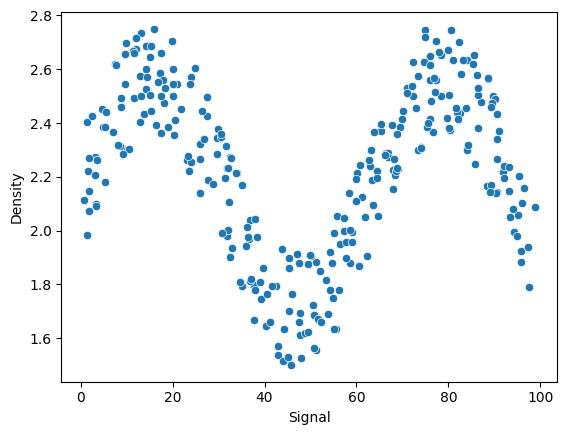

In [ ]:
sns.scatterplot(x = 'Signal', y = 'Density', data = df)
#As the dataset only has one feature, we're not gonna worry about scaling or cross-validation

Data Preparation:

In [6]:
X = df['Signal'] #.values.reshape(-1, 1)
y = df['Density']
#Note that this will lead to an error later without reshaping the data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

Linear Regression:

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train, y_train)
#When you have a single feature (column), you have to reshape using 'array.reshape(-1, 1)'
#When you have a single sample (row), you have to reshape using 'array.reshape(-1, 1)'

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [12]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [14]:
lr_model = LinearRegression()

In [15]:
lr_model.fit(X_train, y_train)

LinearRegression()

Linear Regression Evaluation:

In [16]:
lr_preds = lr_model.predict(X_test)

In [ ]:
lr_preds #Notice the predicted values are all near 2.22, showing that something's wrong with using linear regression for this dataset

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(y_test, lr_preds)
#Considering that the density values are spanning between around 1.6 and 2.8, this doesn't seem too bad, as you're only off by around 10 percent
#However, this doesn't show the whole problem

0.211198973318633

In [ ]:
np.sqrt(mean_squared_error(y_test, lr_preds))
#This is also deceiving; Try plotting out the predictive model

np.float64(0.2570051996584629)

In [22]:
signal_range = np.arange(0, 100)

In [23]:
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [24]:
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))

In [25]:
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

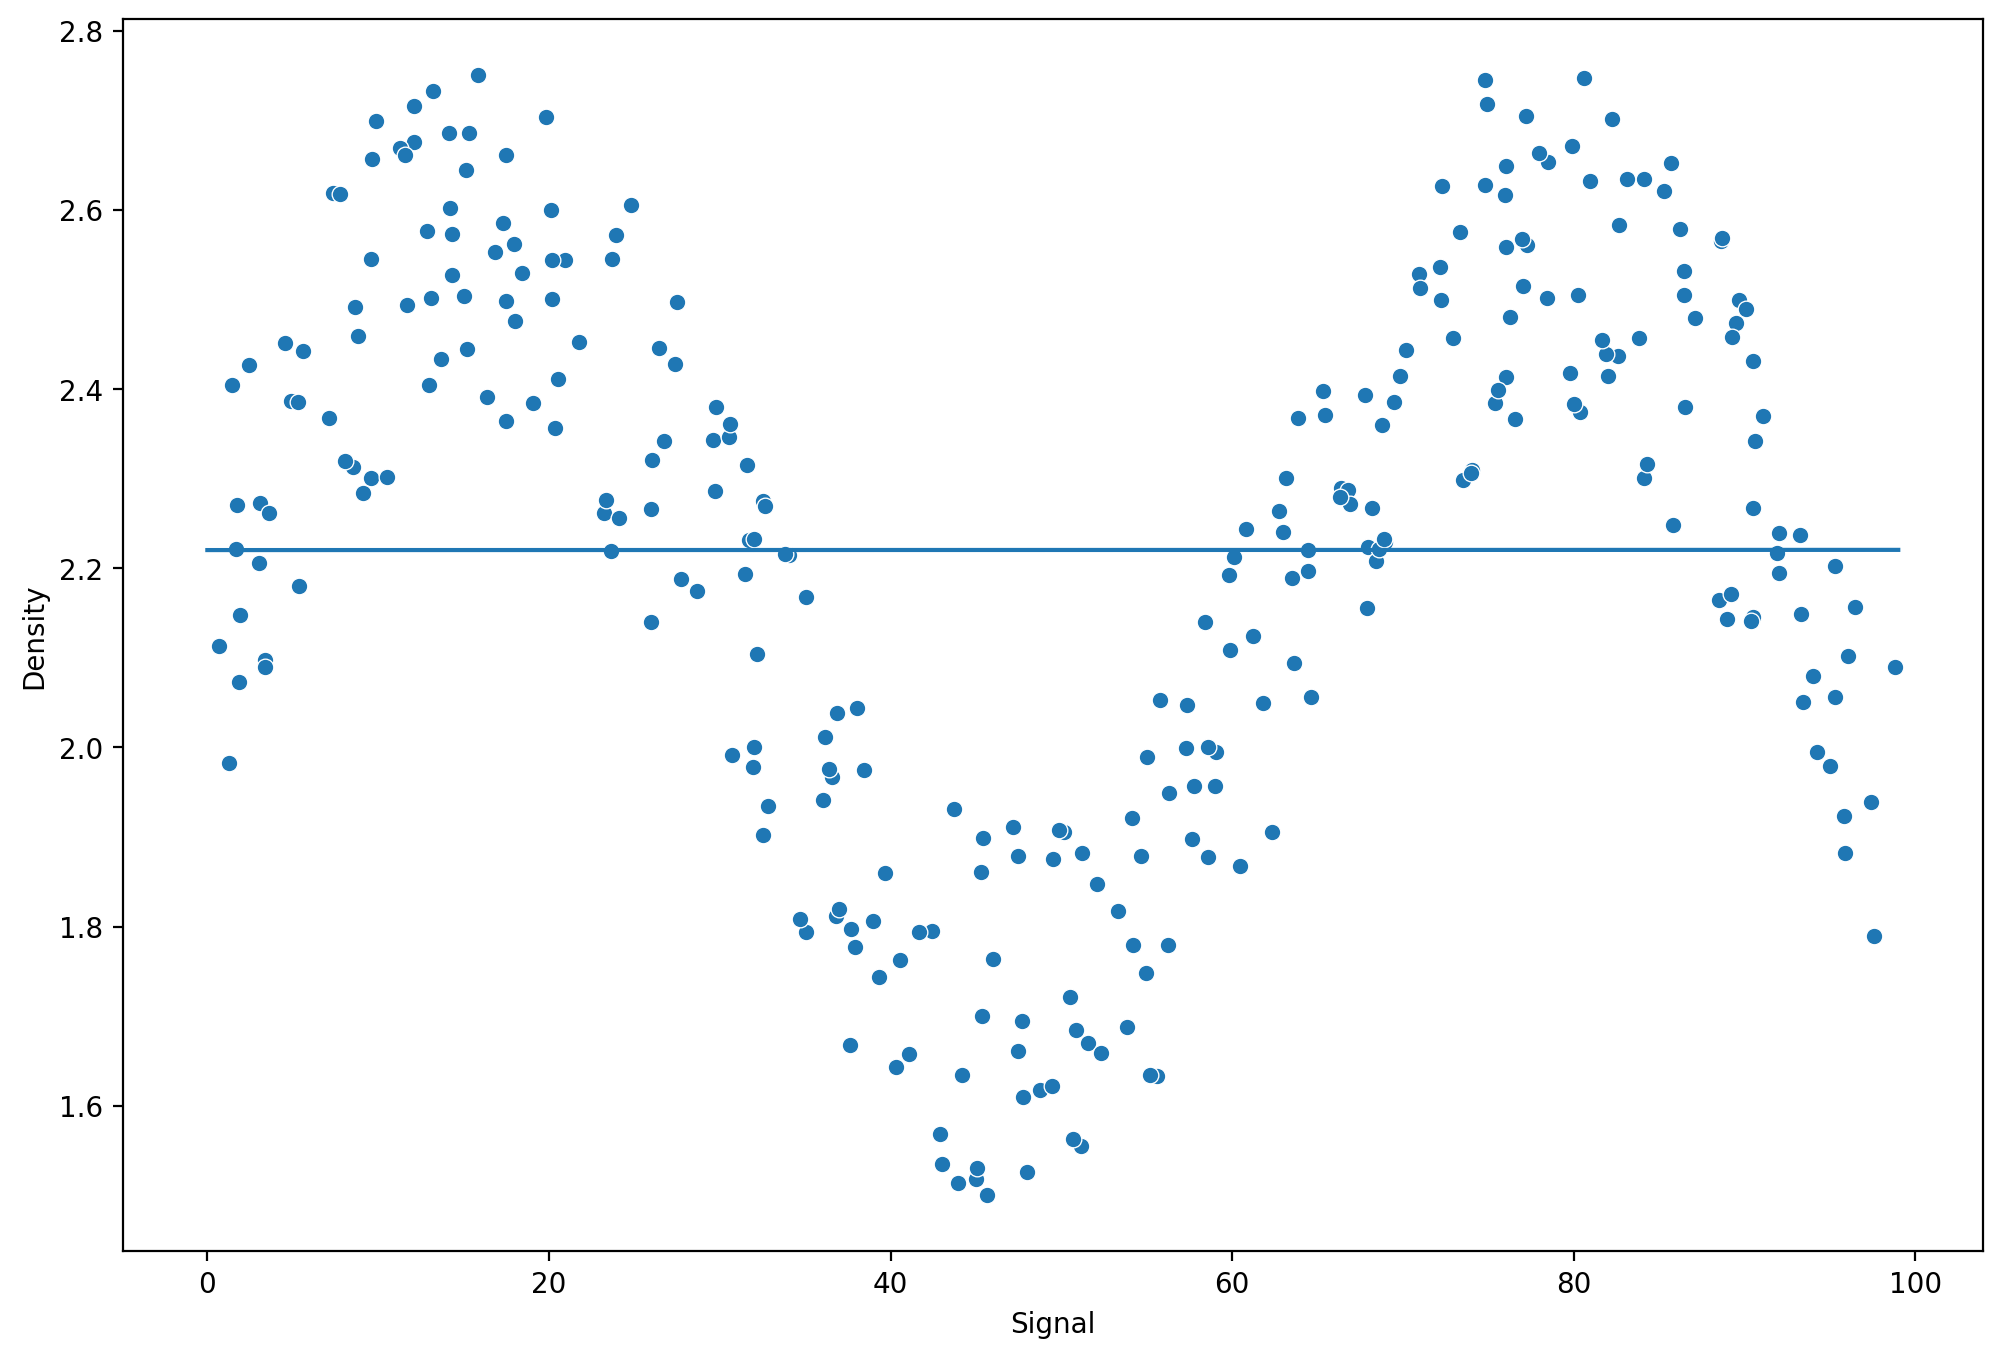

In [ ]:
plt.figure(figsize = (12, 8), dpi = 200)
sns.scatterplot(x = 'Signal', y = 'Density', data = df)

plt.plot(signal_range, signal_preds)
#Now you can clearly see that a linear regression model simply cannot fit to this data; it's trying to fit a straight line to something that has curvature characteristics

Creating A Helper Function:

In [27]:
#A helper function that fits a model and displays the error metrics and plots the output function against the original data
def run_model(model, X_train, y_train, X_test, y_test):

    # FIT MODEL TRAINING
    model.fit(X_train, y_train)

    # GET METRICS
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')

    #PLOT RESULTS MODEL SIGNAL RANGE
    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))

    plt.figure(figsize = (12, 8), dpi = 200)
    sns.scatterplot(x = 'Signal', y = 'Density', data = df, color = 'black')

    plt.plot(signal_range, signal_preds)

MAE: 0.211198973318633
RMSE: 0.2570051996584629


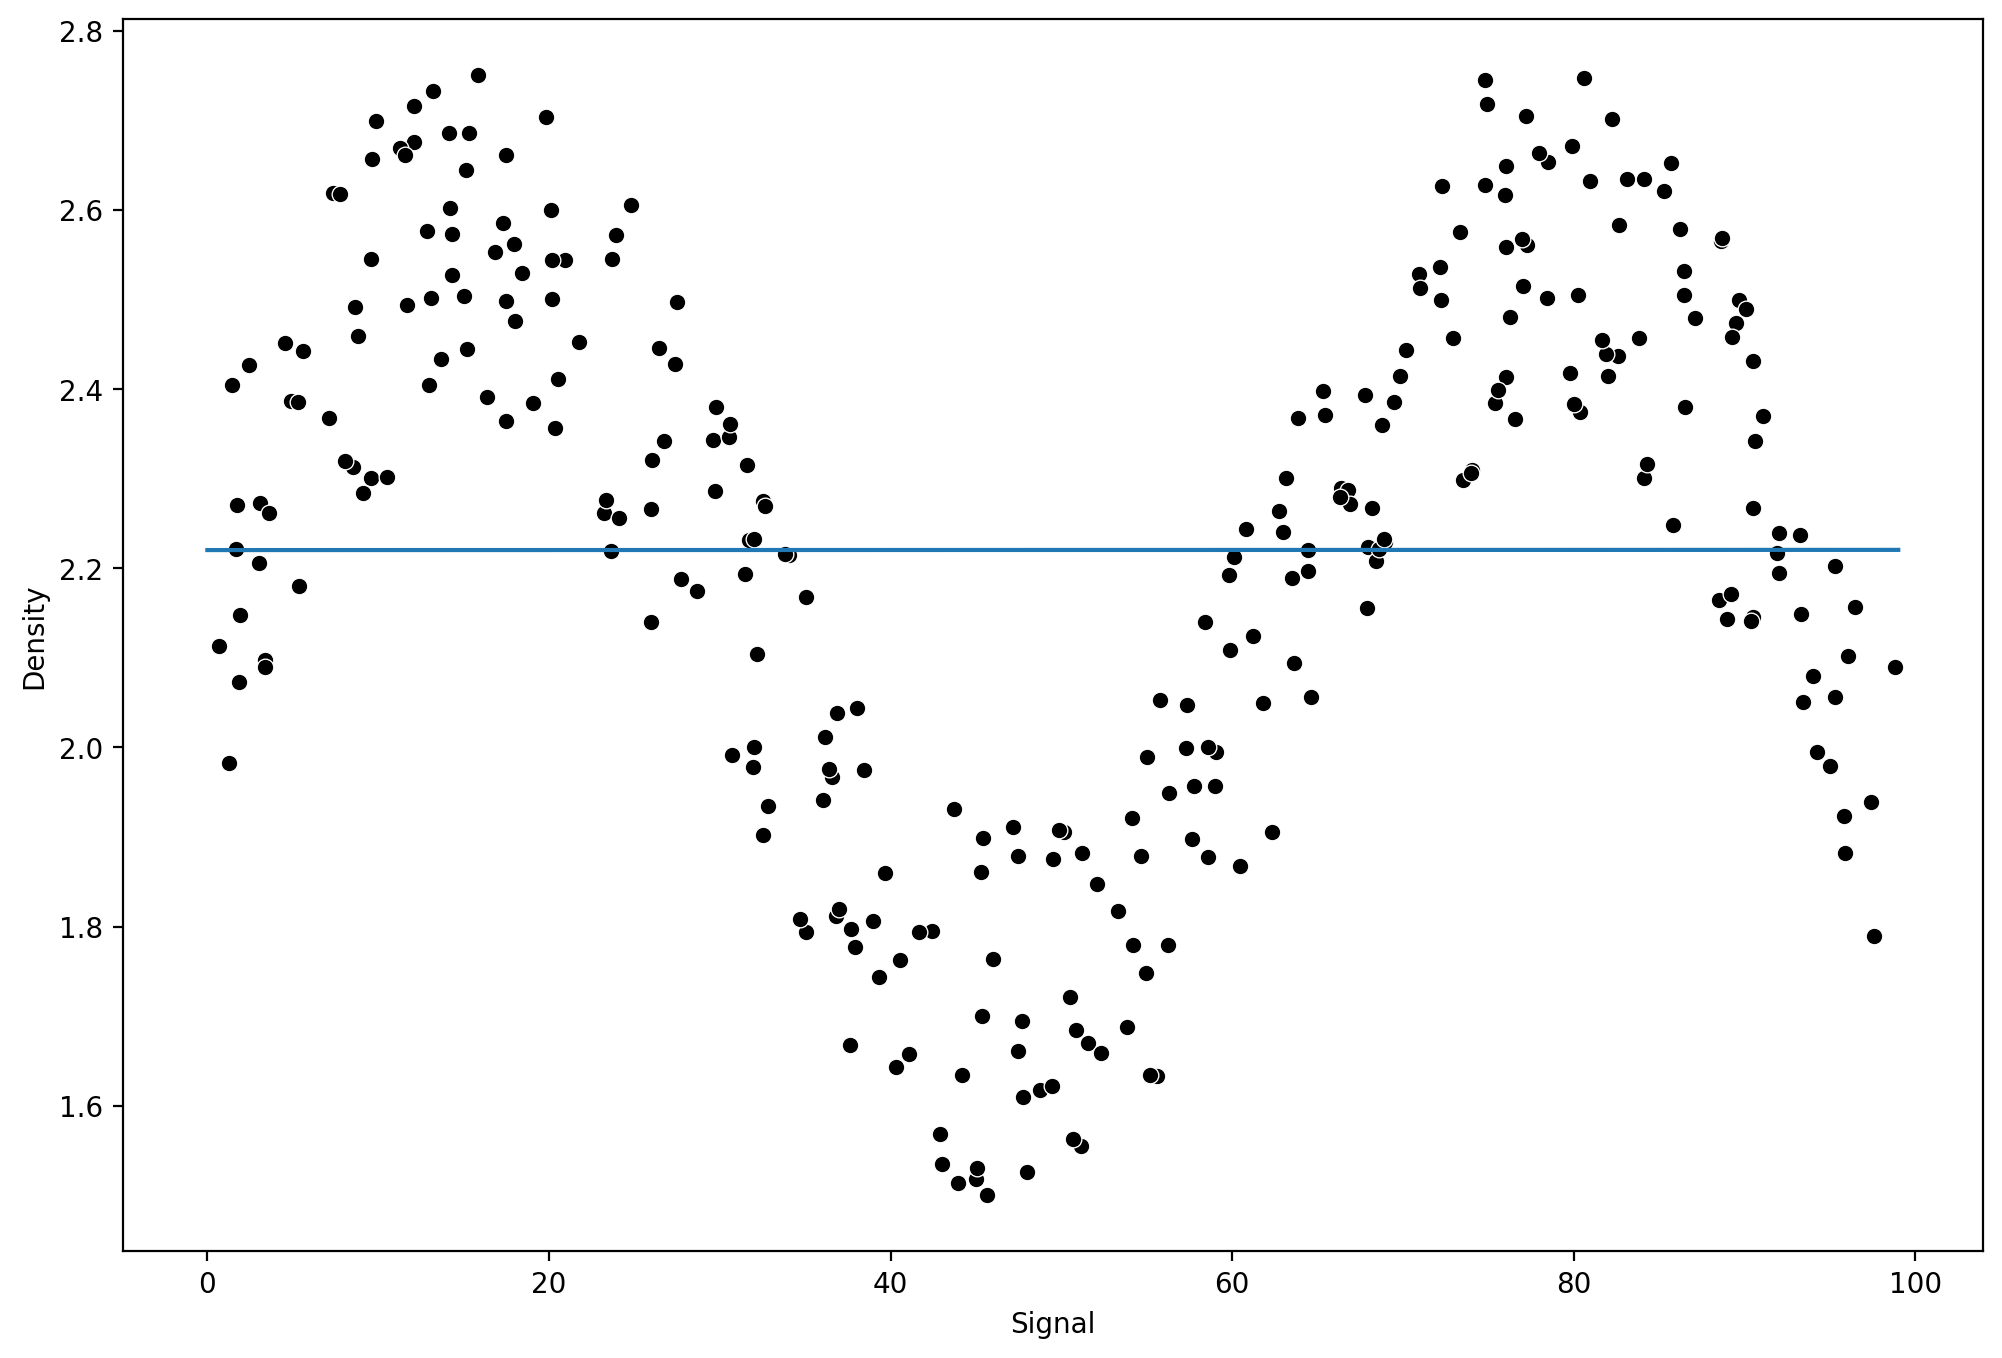

In [28]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

Polynomial Regression With A Pipeline:

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [30]:
pipe = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())

MAE: 0.22903105443511335
RMSE: 0.2817309563725596


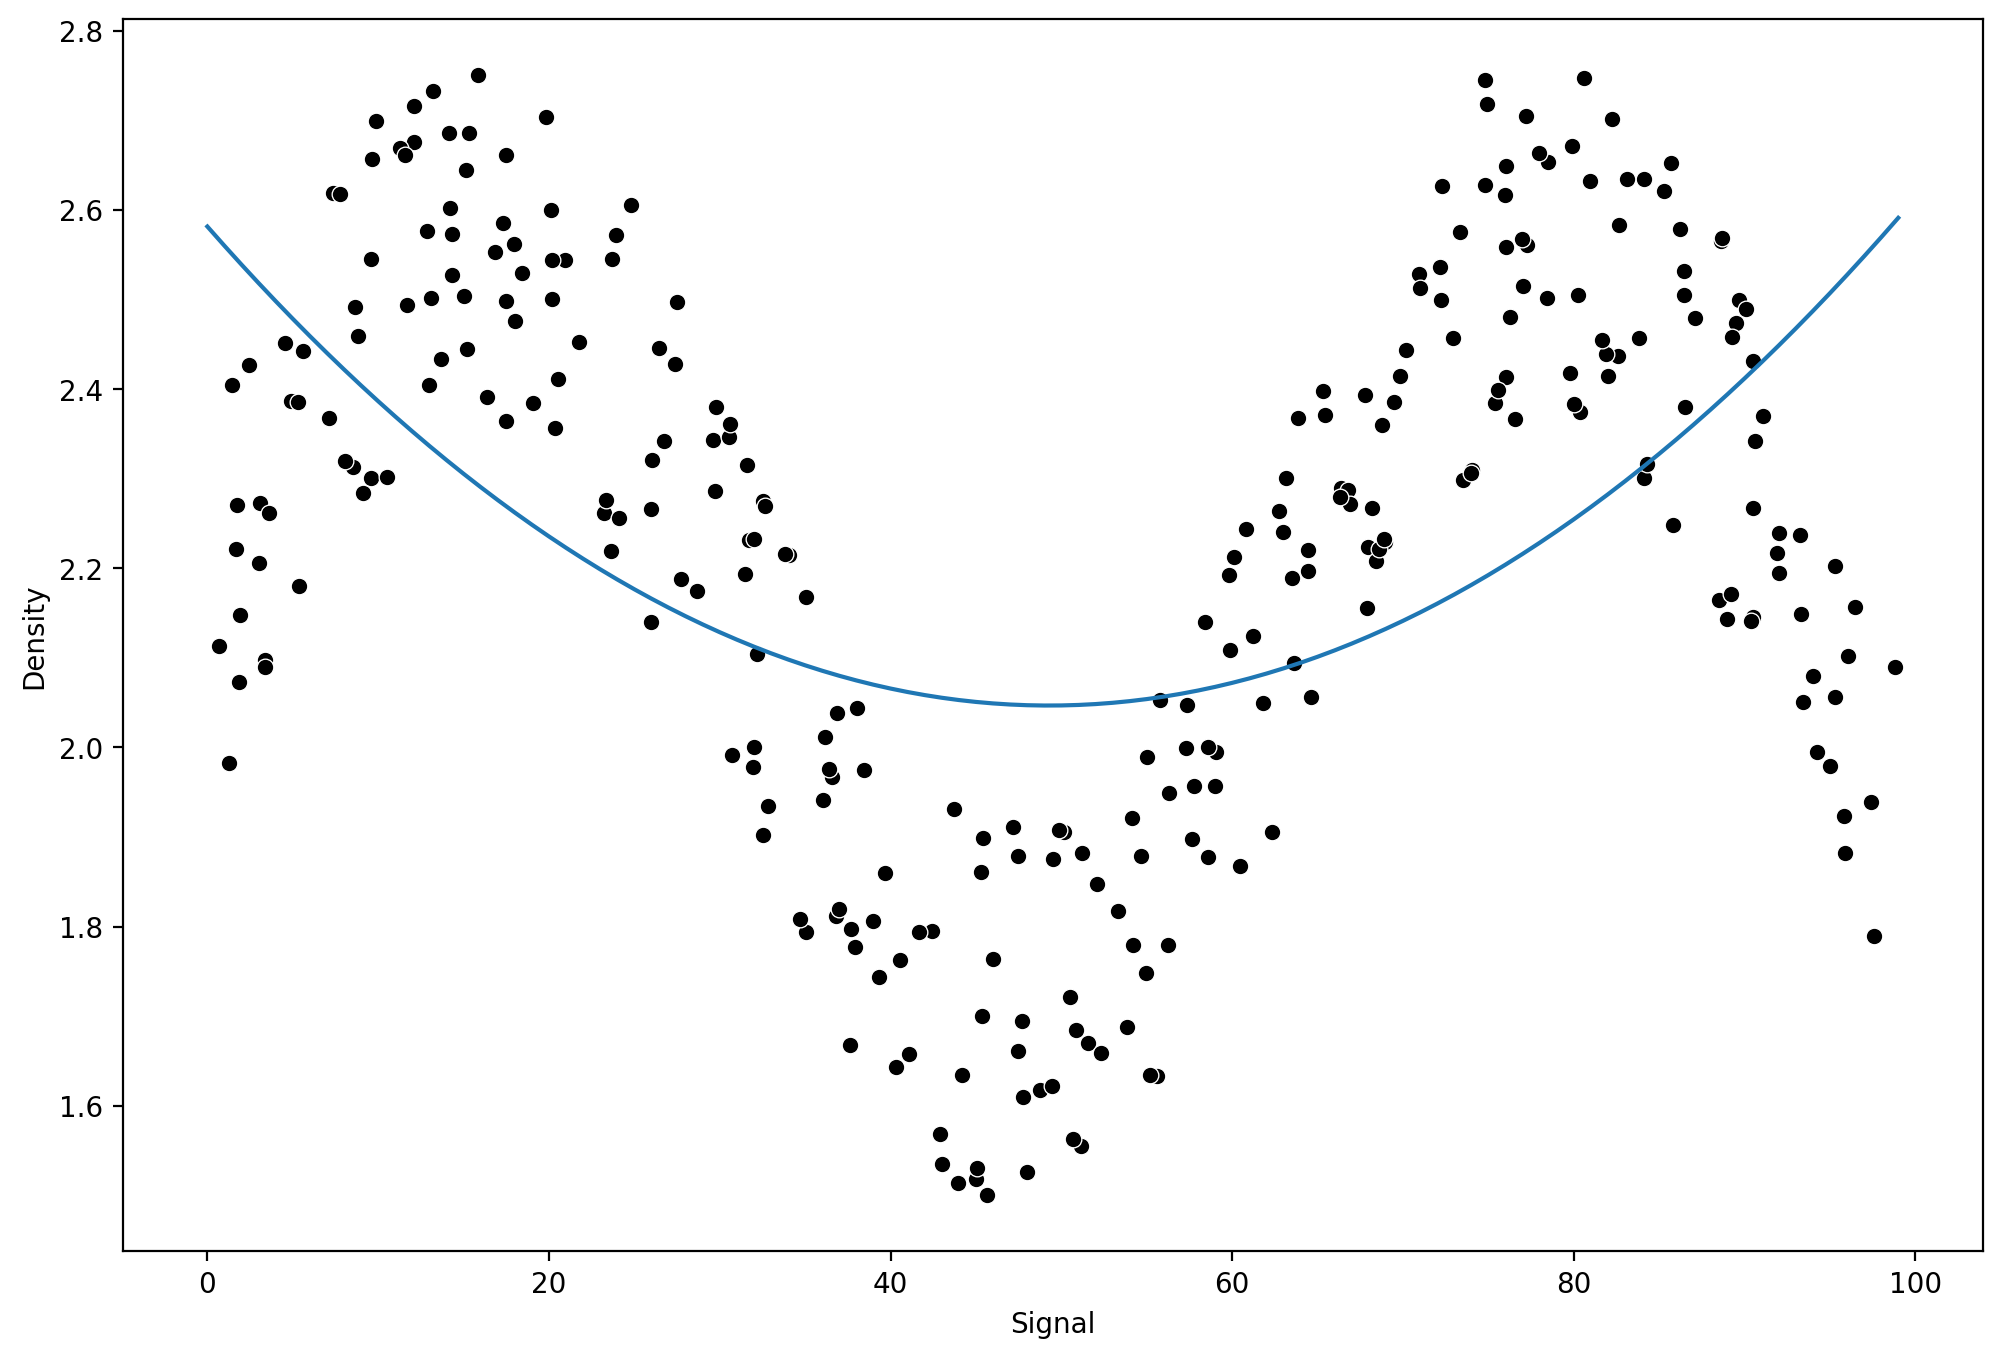

In [31]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [34]:
pipe = make_pipeline(PolynomialFeatures(degree = 3), LinearRegression())

MAE: 0.2421183403953149
RMSE: 0.287974812791889


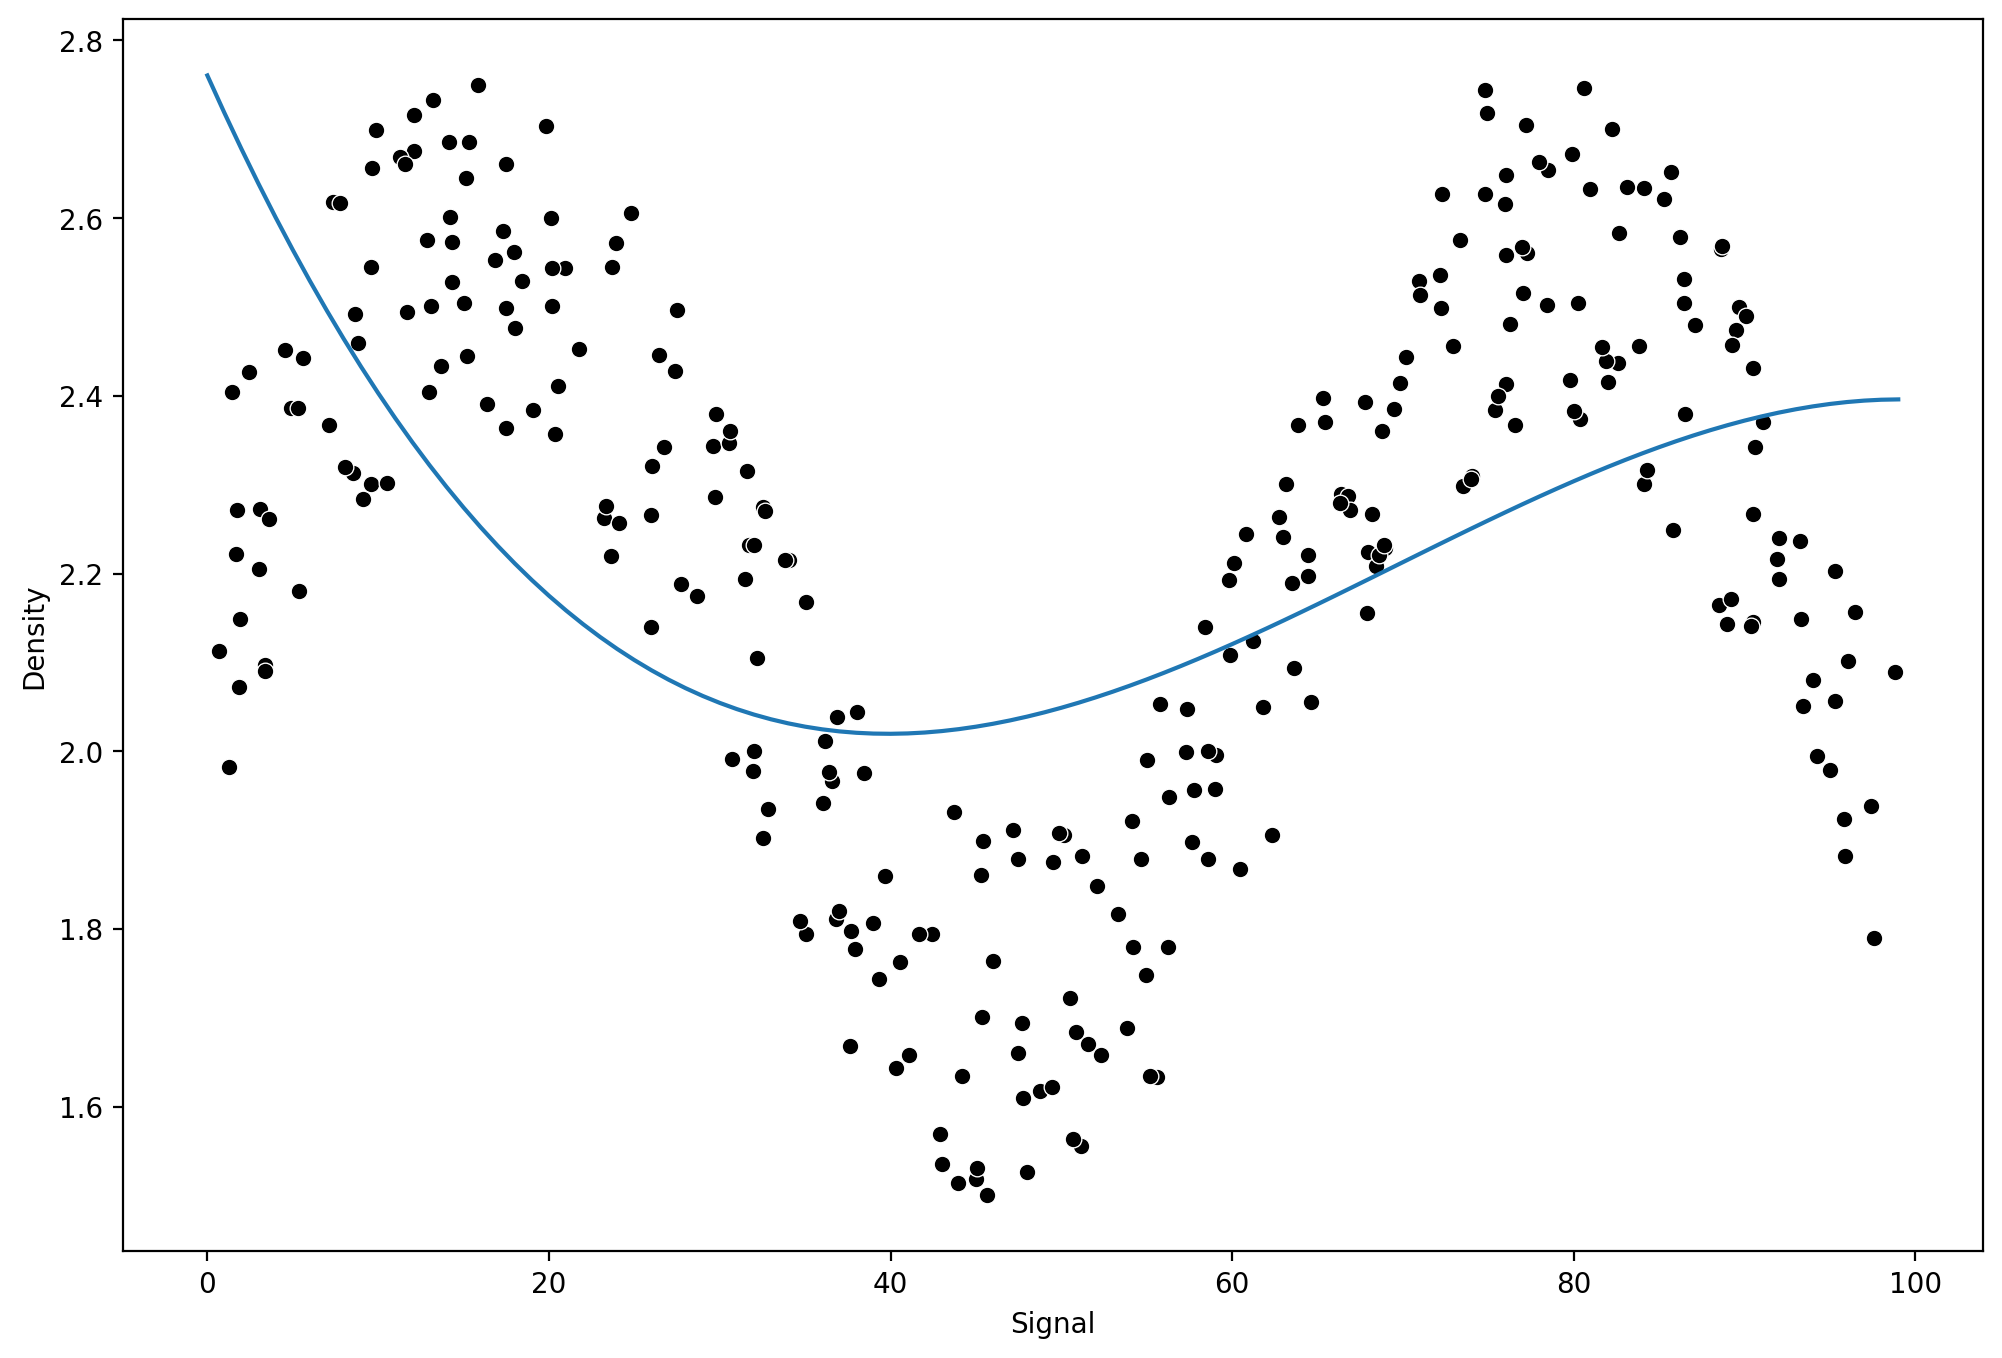

In [35]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [36]:
pipe = make_pipeline(PolynomialFeatures(degree = 6), LinearRegression())

MAE: 0.11969168049270058
RMSE: 0.13807520083403252


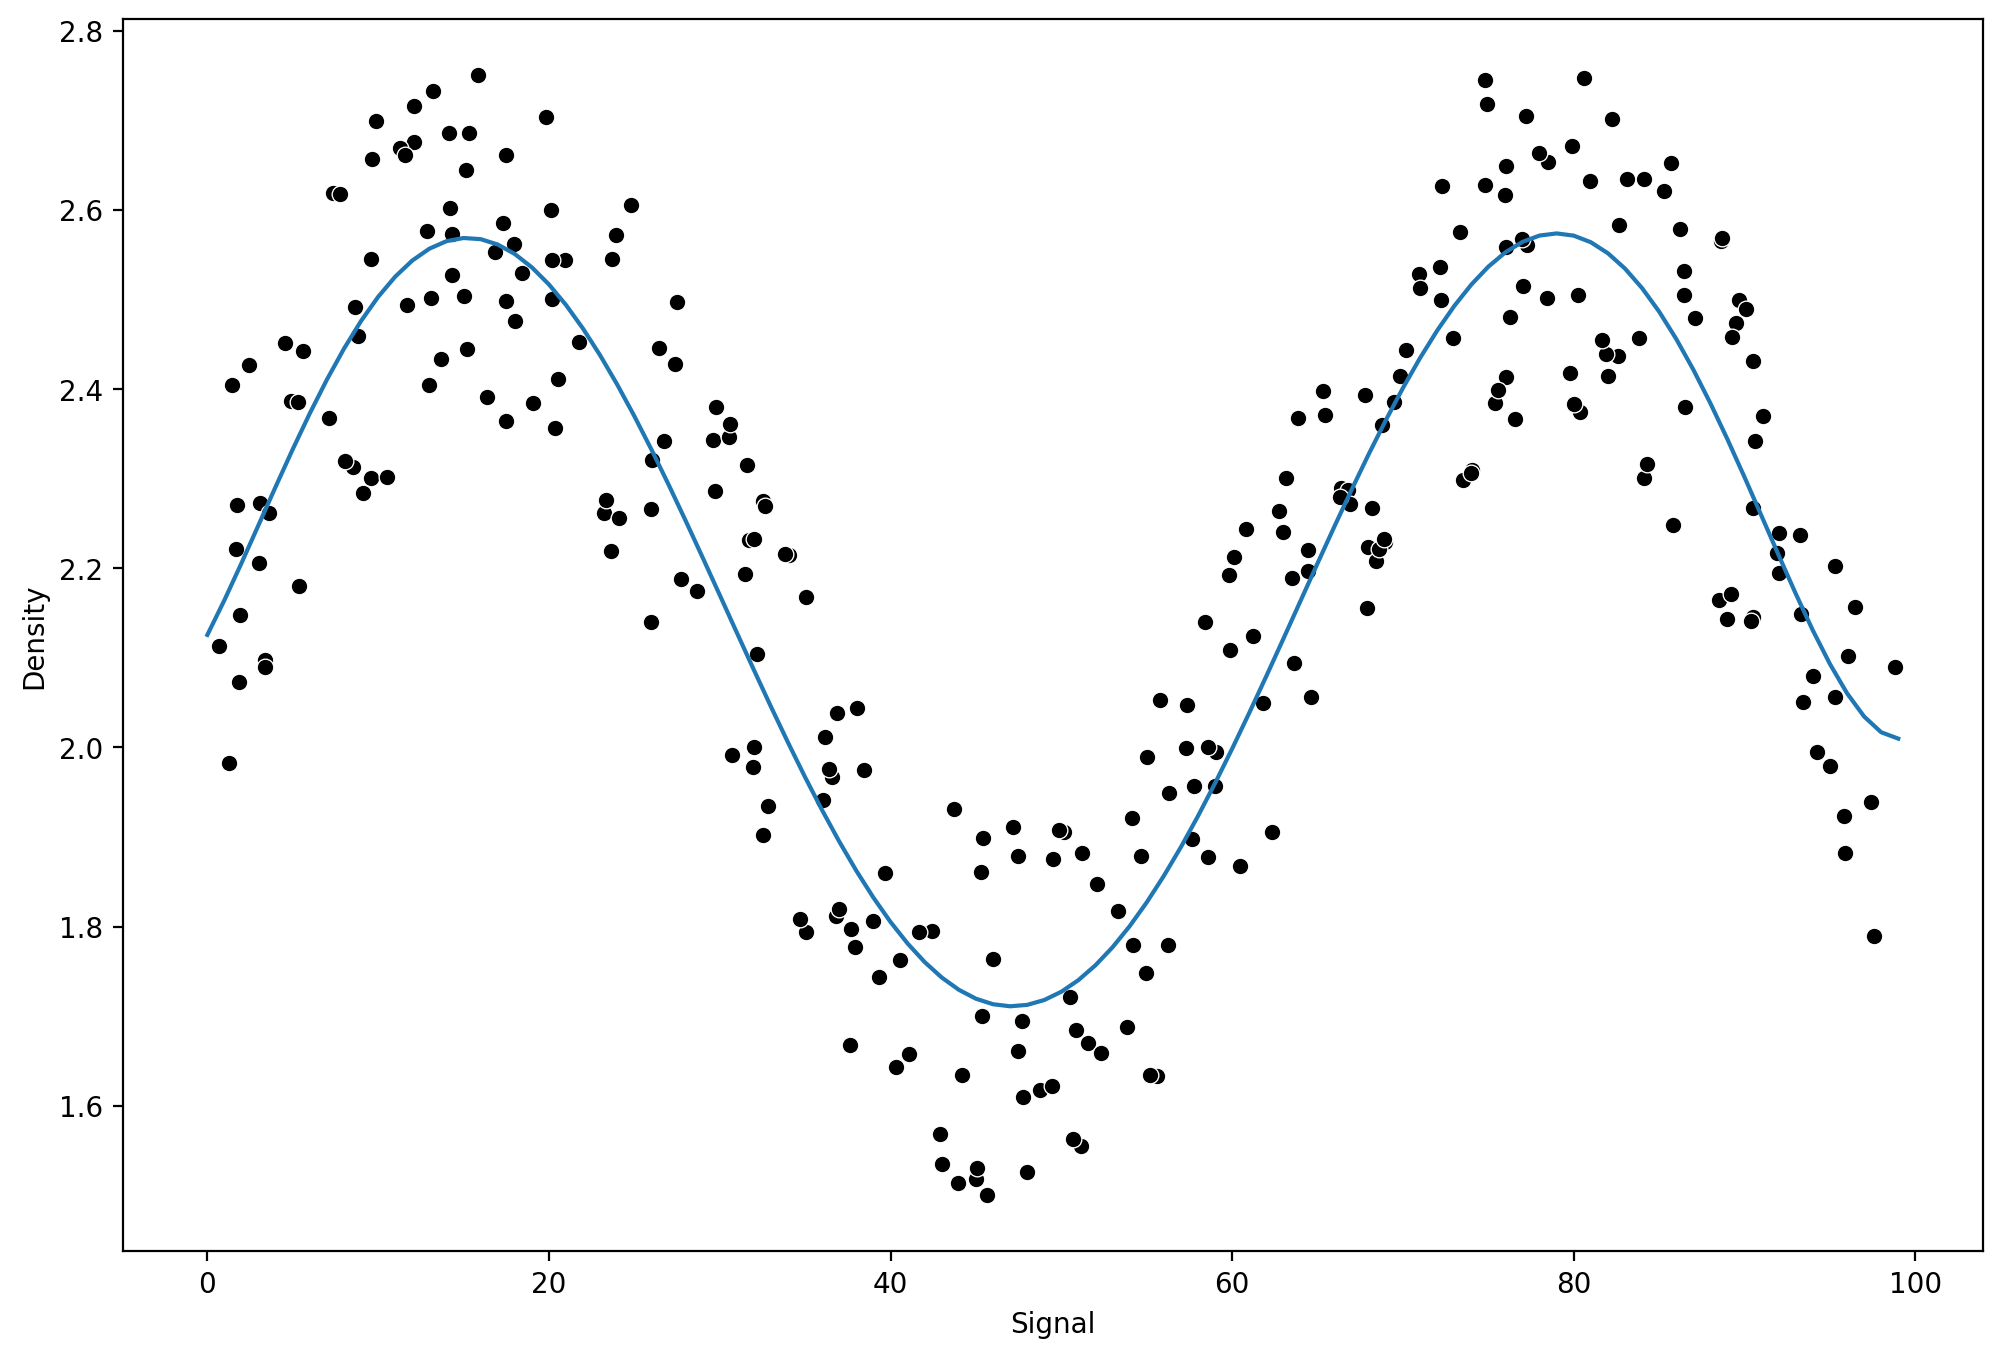

In [37]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [32]:
pipe = make_pipeline(PolynomialFeatures(degree = 10), LinearRegression())

MAE: 0.1433857719391462
RMSE: 0.16269005292854596


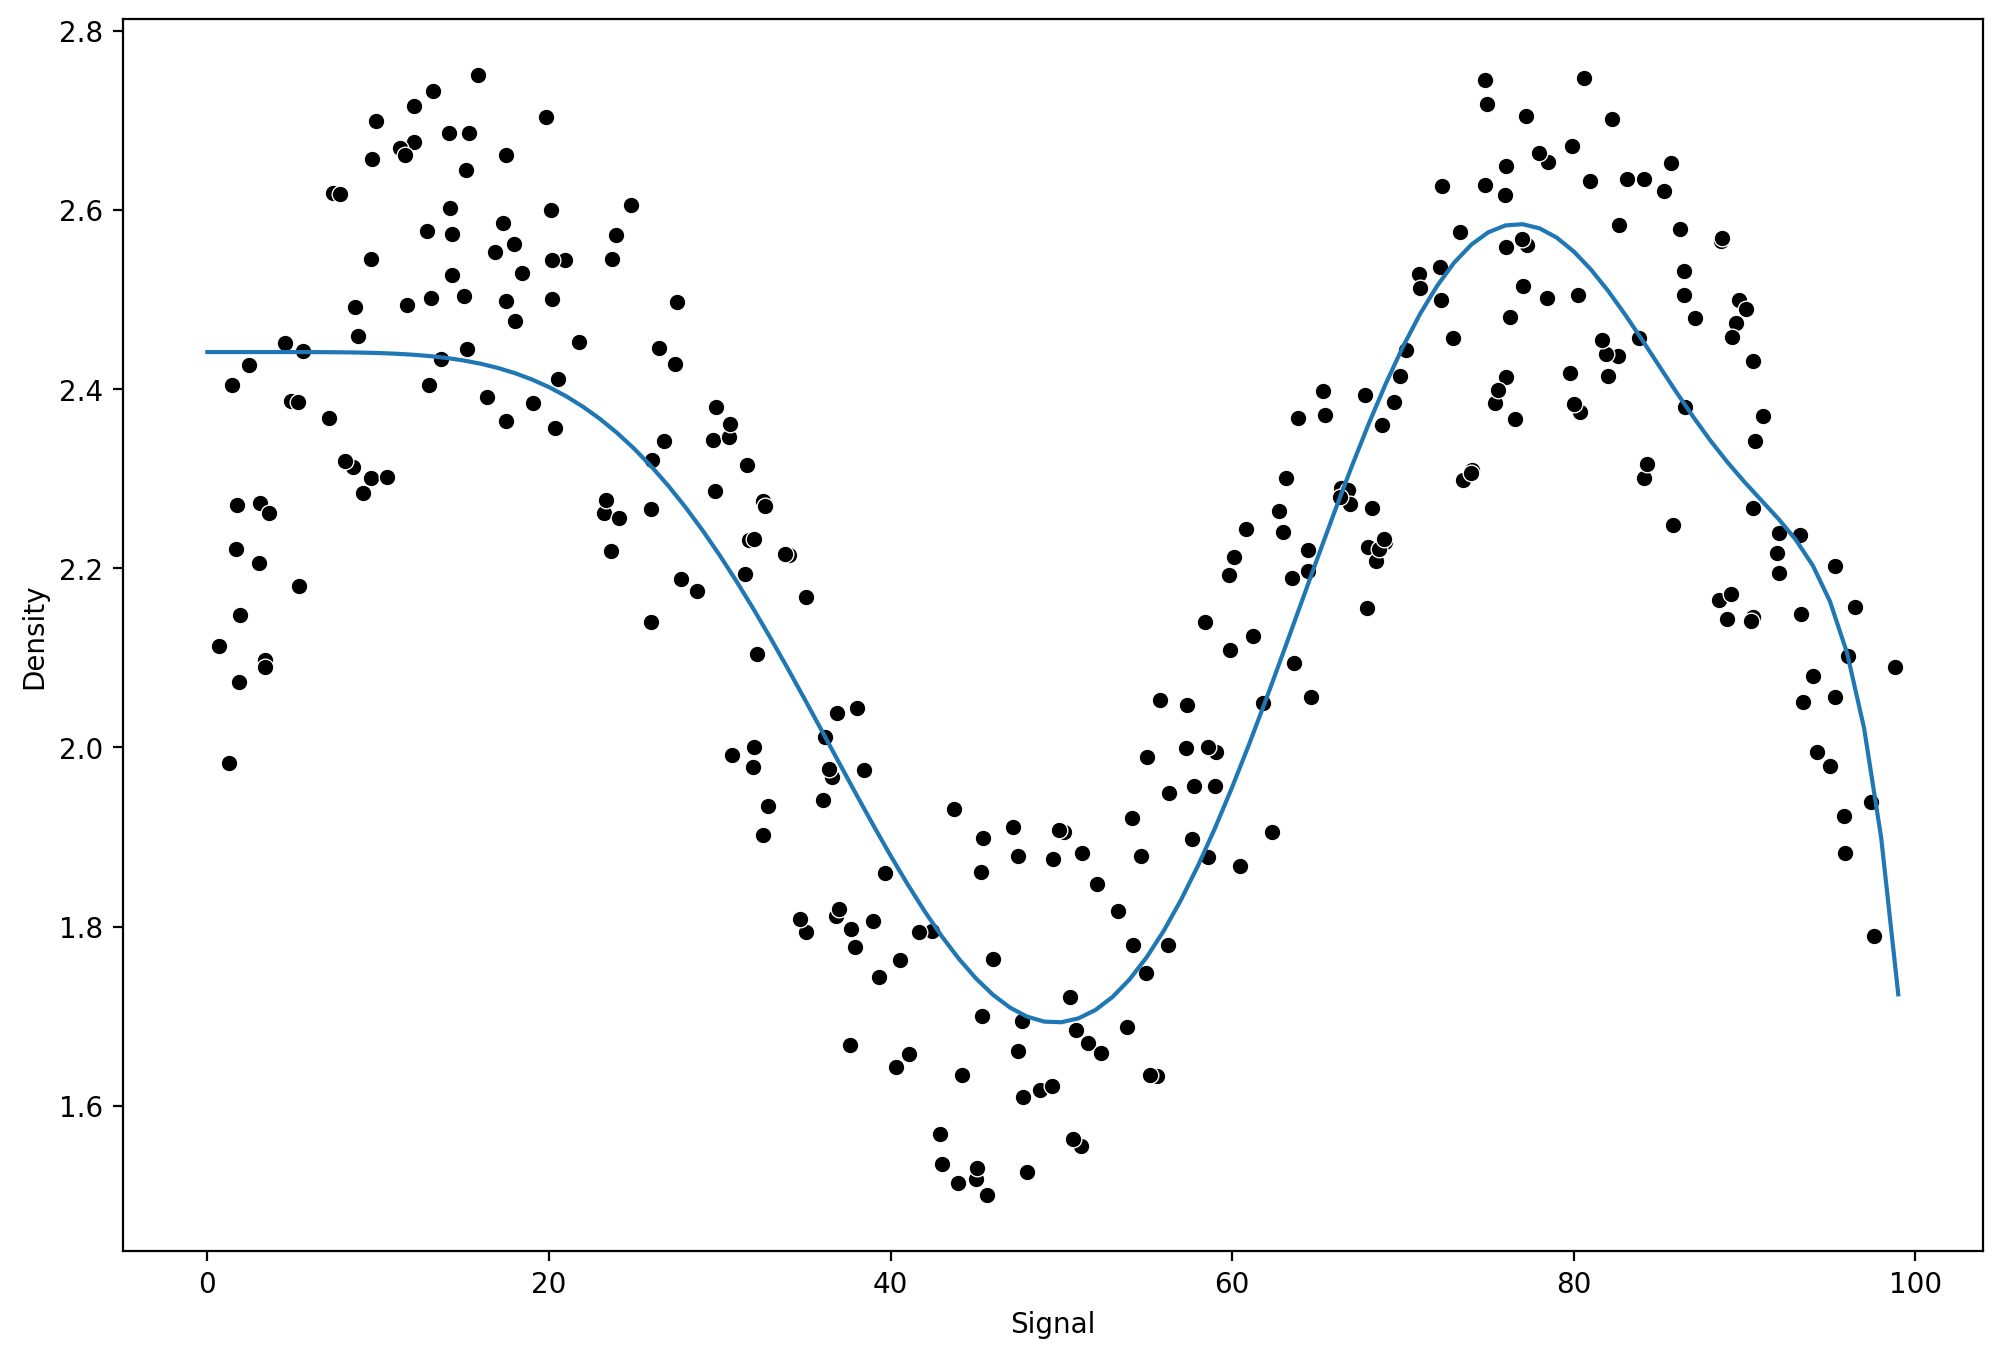

In [33]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [38]:
pipe = make_pipeline(PolynomialFeatures(degree = 25), LinearRegression())

MAE: 0.20988580781961985
RMSE: 0.25685821180907753


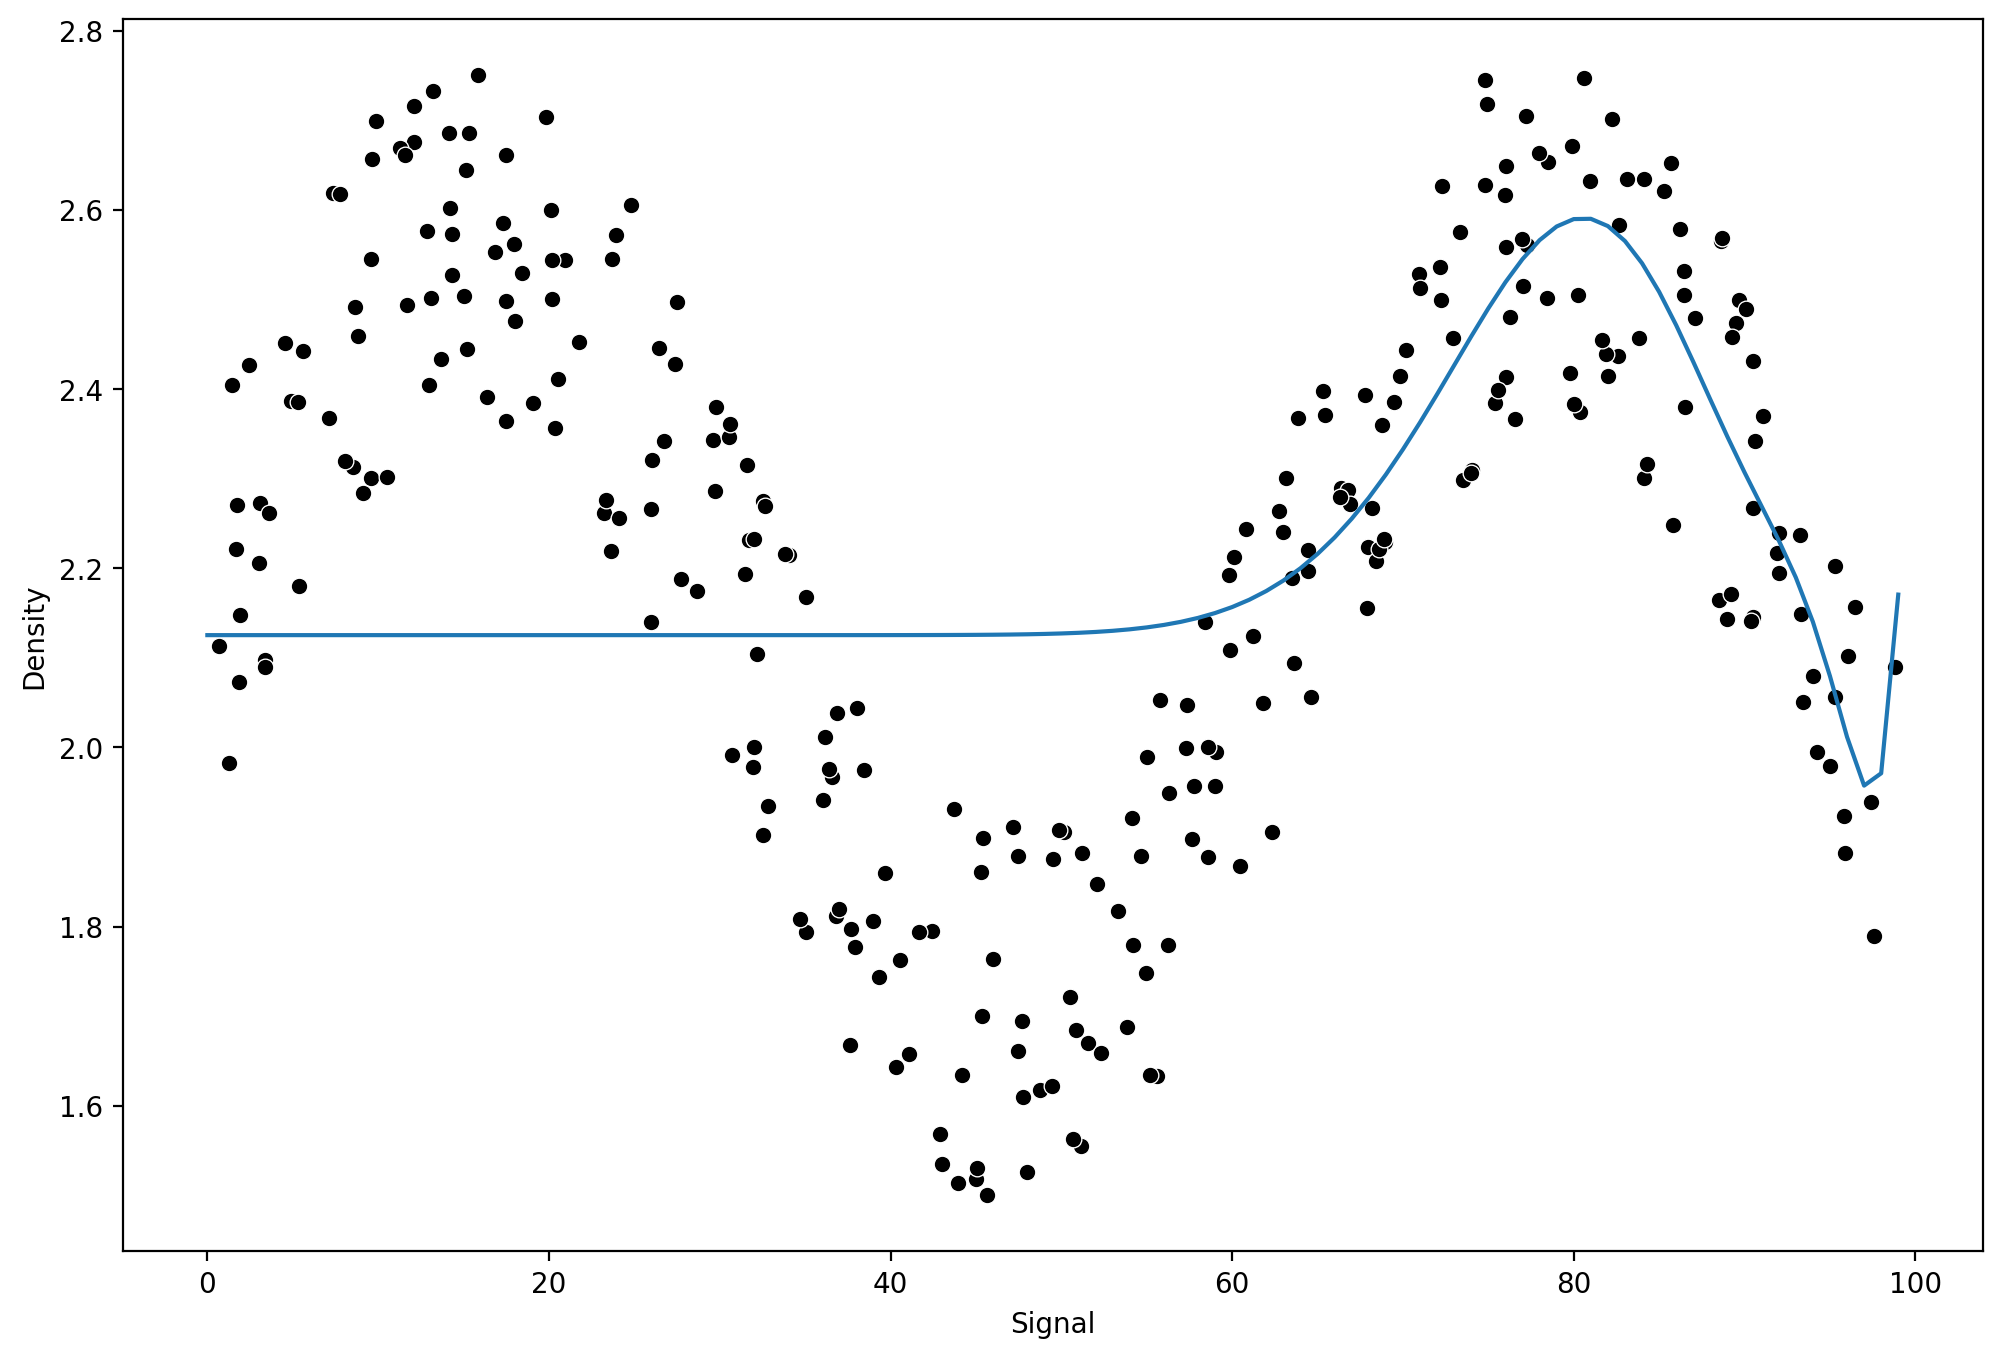

In [39]:
run_model(pipe, X_train, y_train, X_test, y_test)
#Beware of overfitting at high polynomial orders

In [40]:
pipe = make_pipeline(PolynomialFeatures(degree = 15), LinearRegression())

MAE: 0.20769800884608297
RMSE: 0.23993961037172784


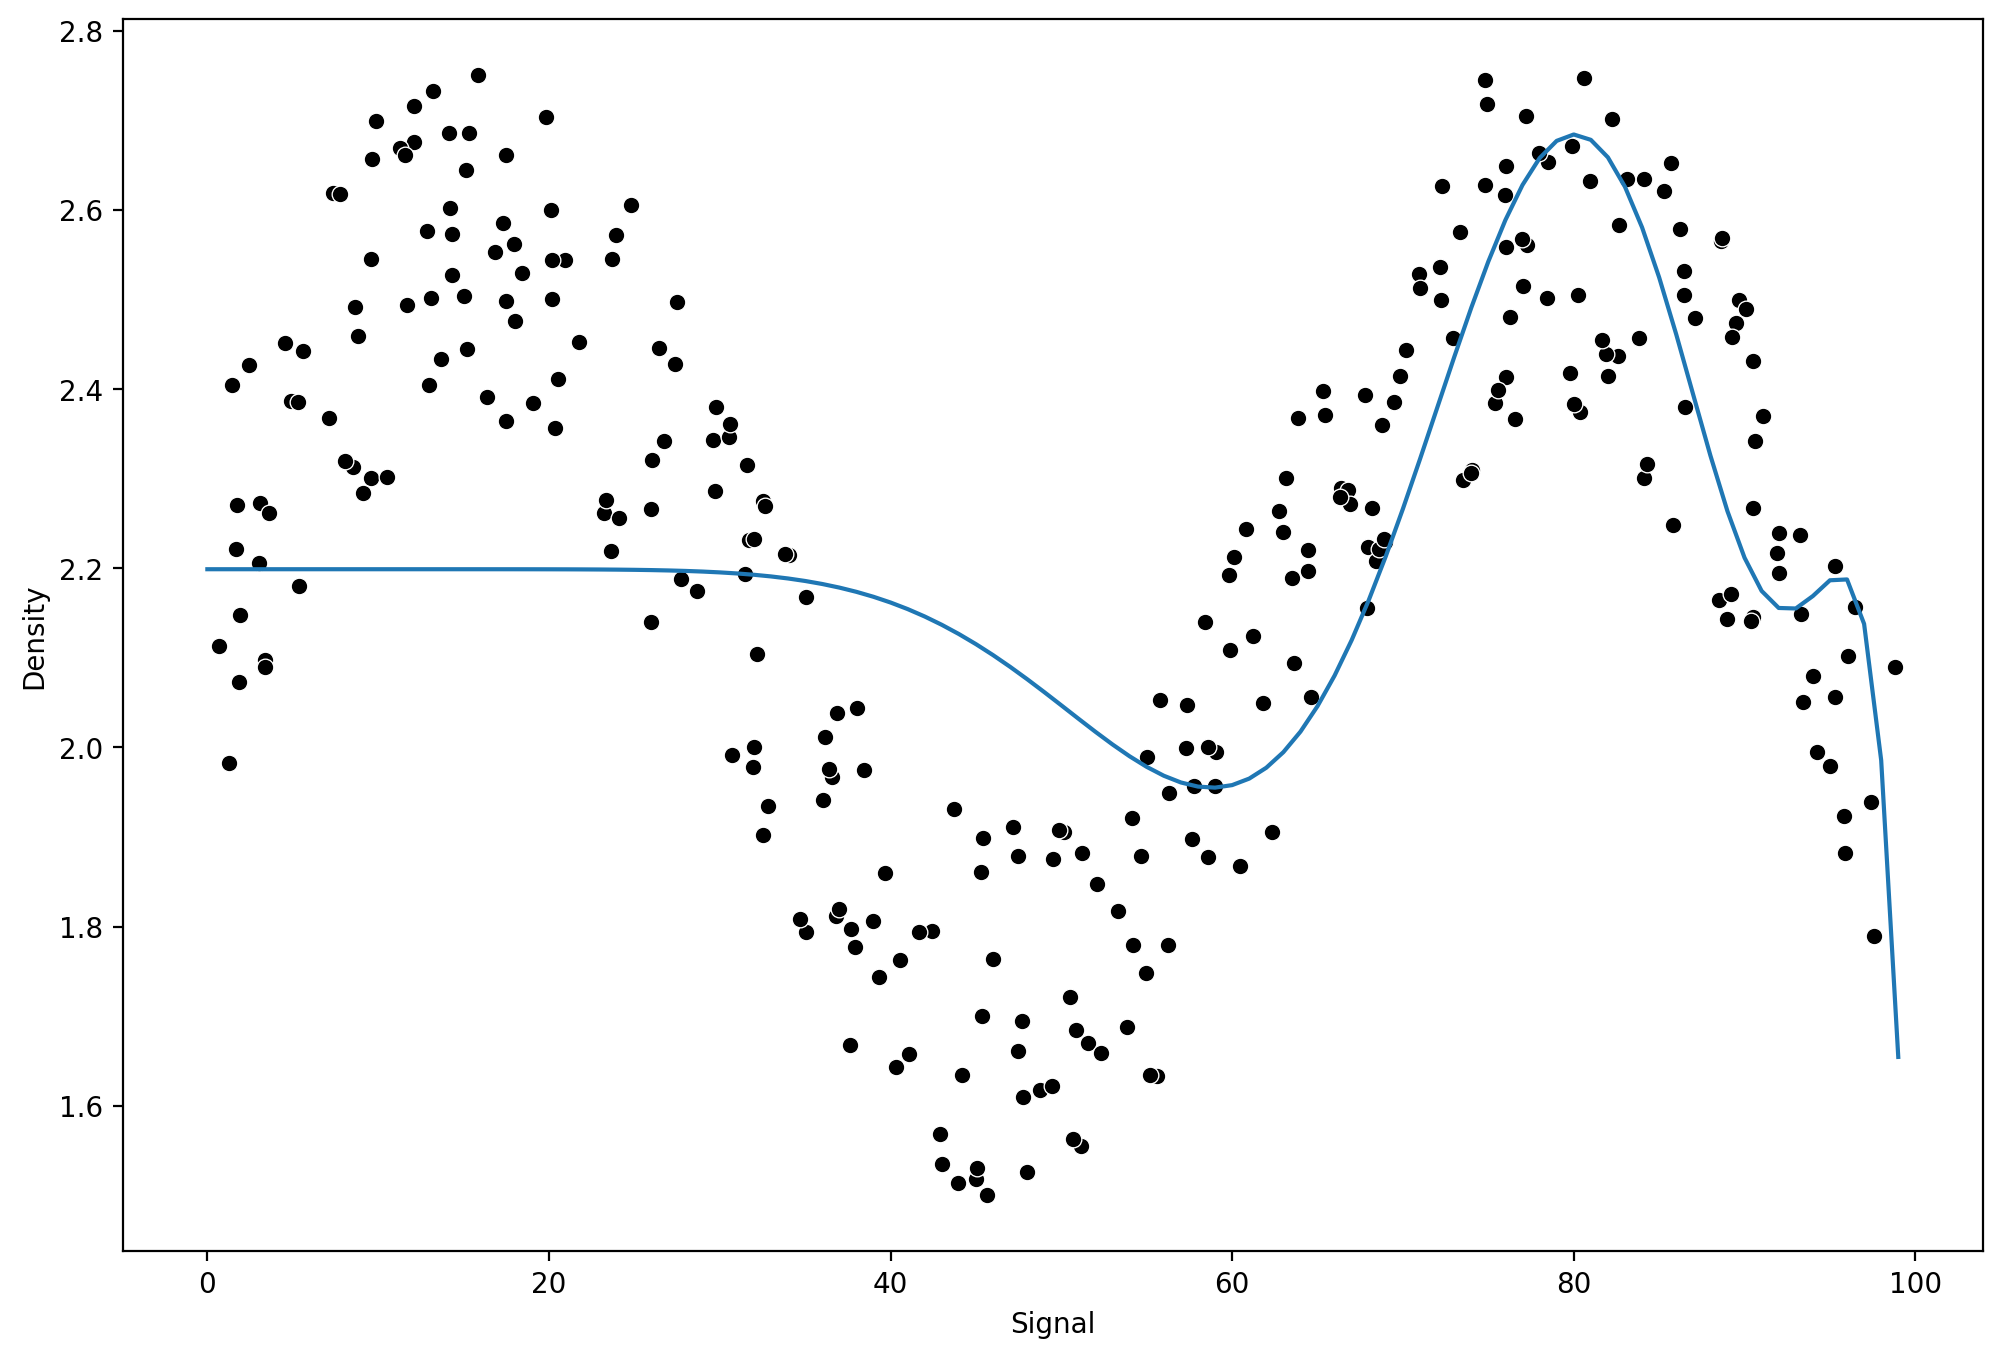

In [41]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [42]:
pipe = make_pipeline(PolynomialFeatures(degree = 6), LinearRegression())
#In this case, a degree of 6 was found to be the best fit

MAE: 0.11969168049270058
RMSE: 0.13807520083403252


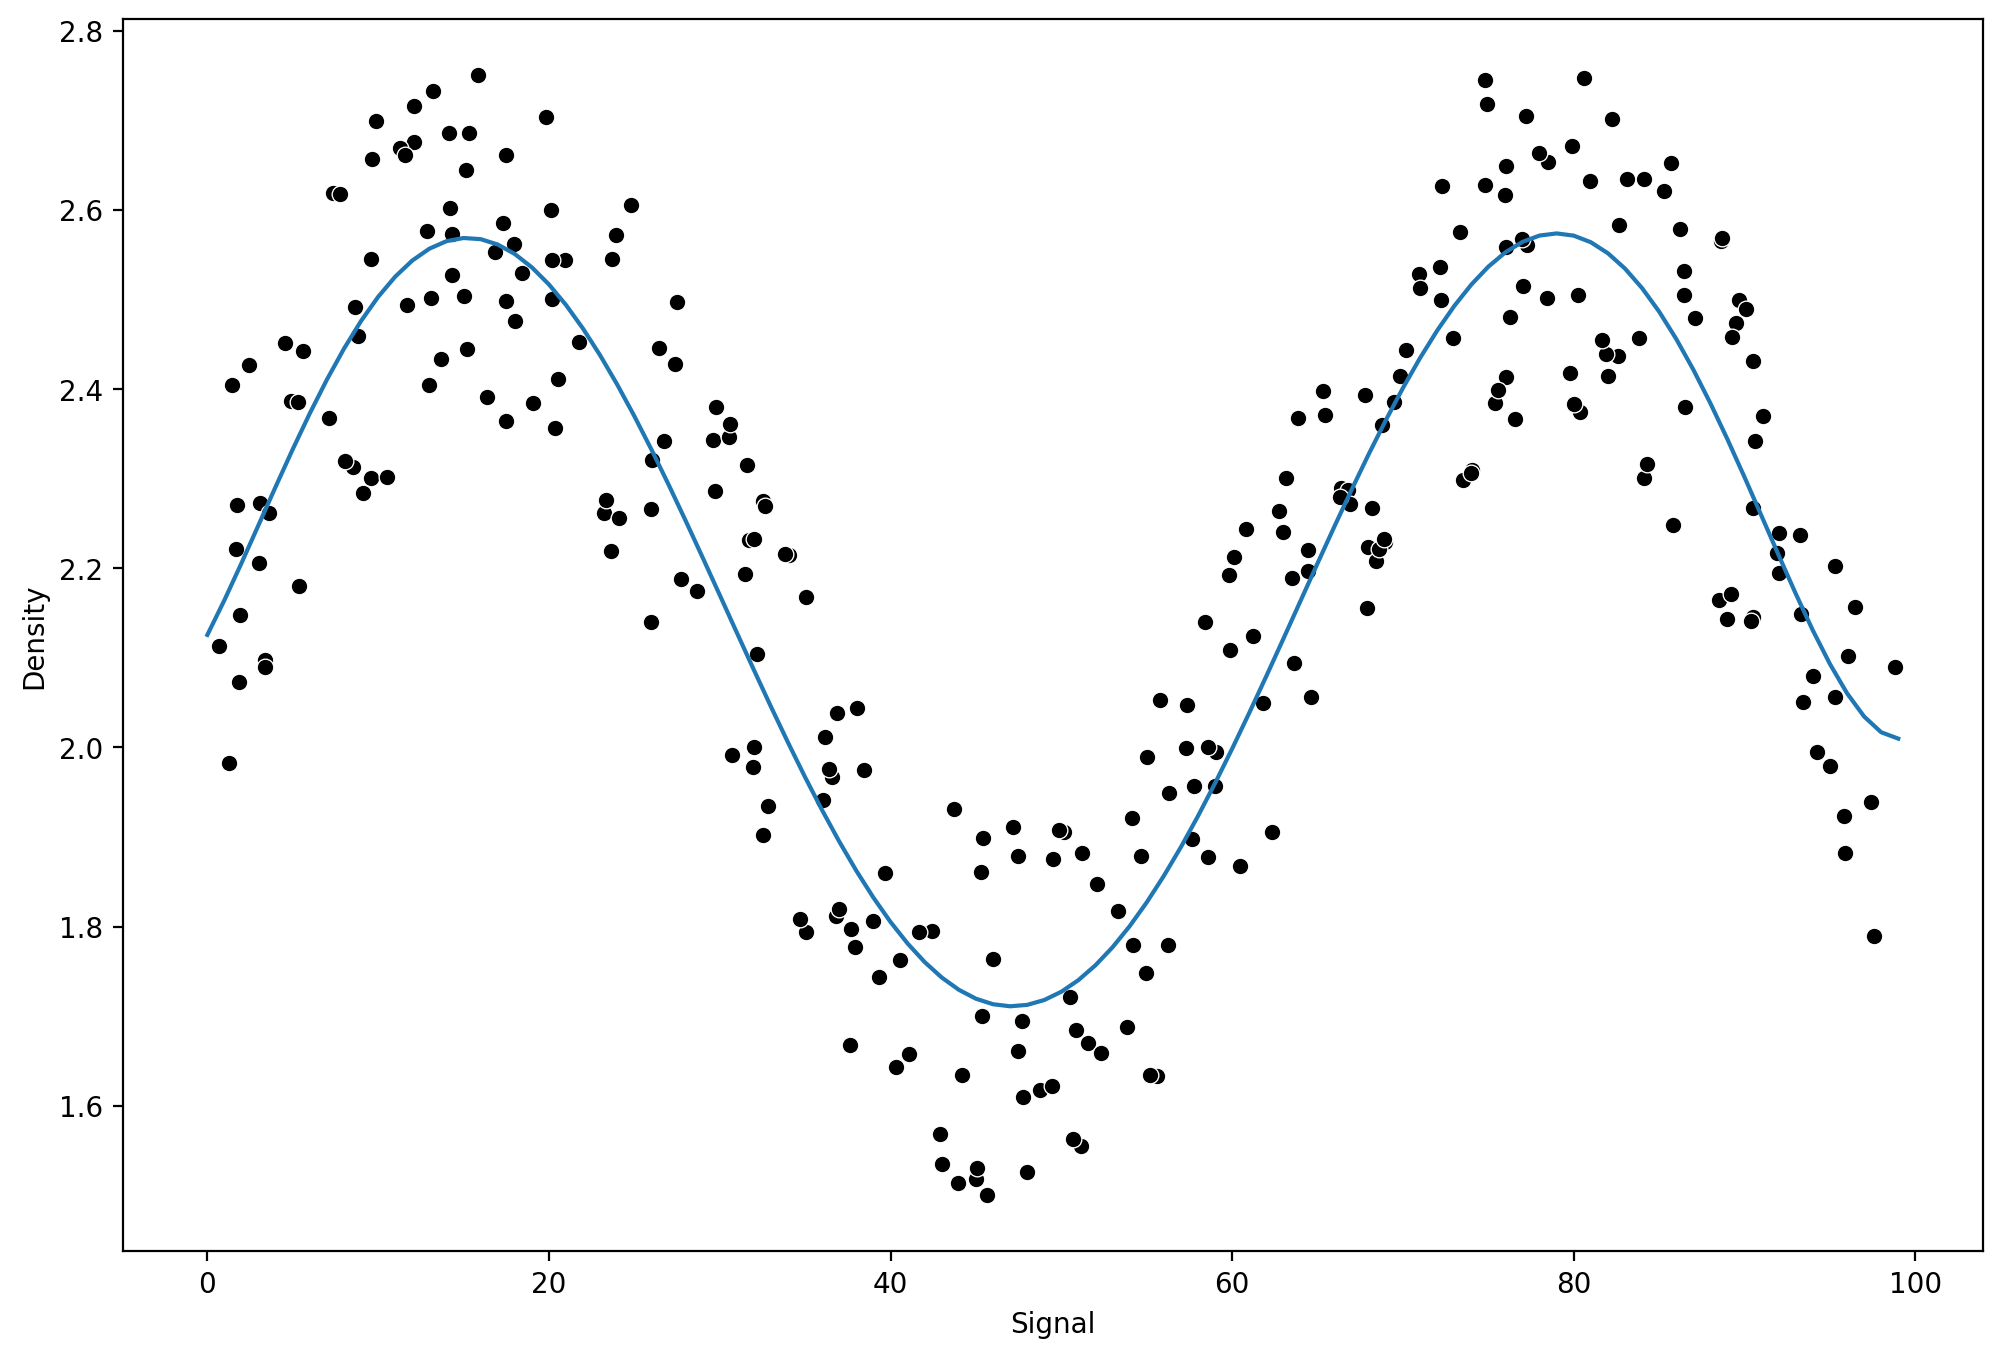

In [45]:
run_model(pipe, X_train, y_train, X_test, y_test)
#What if you wanted to expand this to a wider range where you don't have training data?
#Polynomial regression only works within the training range, as the model explodes to extreme values beyond the training range

K-Nearest-Neighbors Regression:

In [46]:
from sklearn.neighbors import KNeighborsRegressor
#This is actually the first time you'll see KNN used in a regression task

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926
MAE: 0.13363165935705318
RMSE: 0.15954234753677107


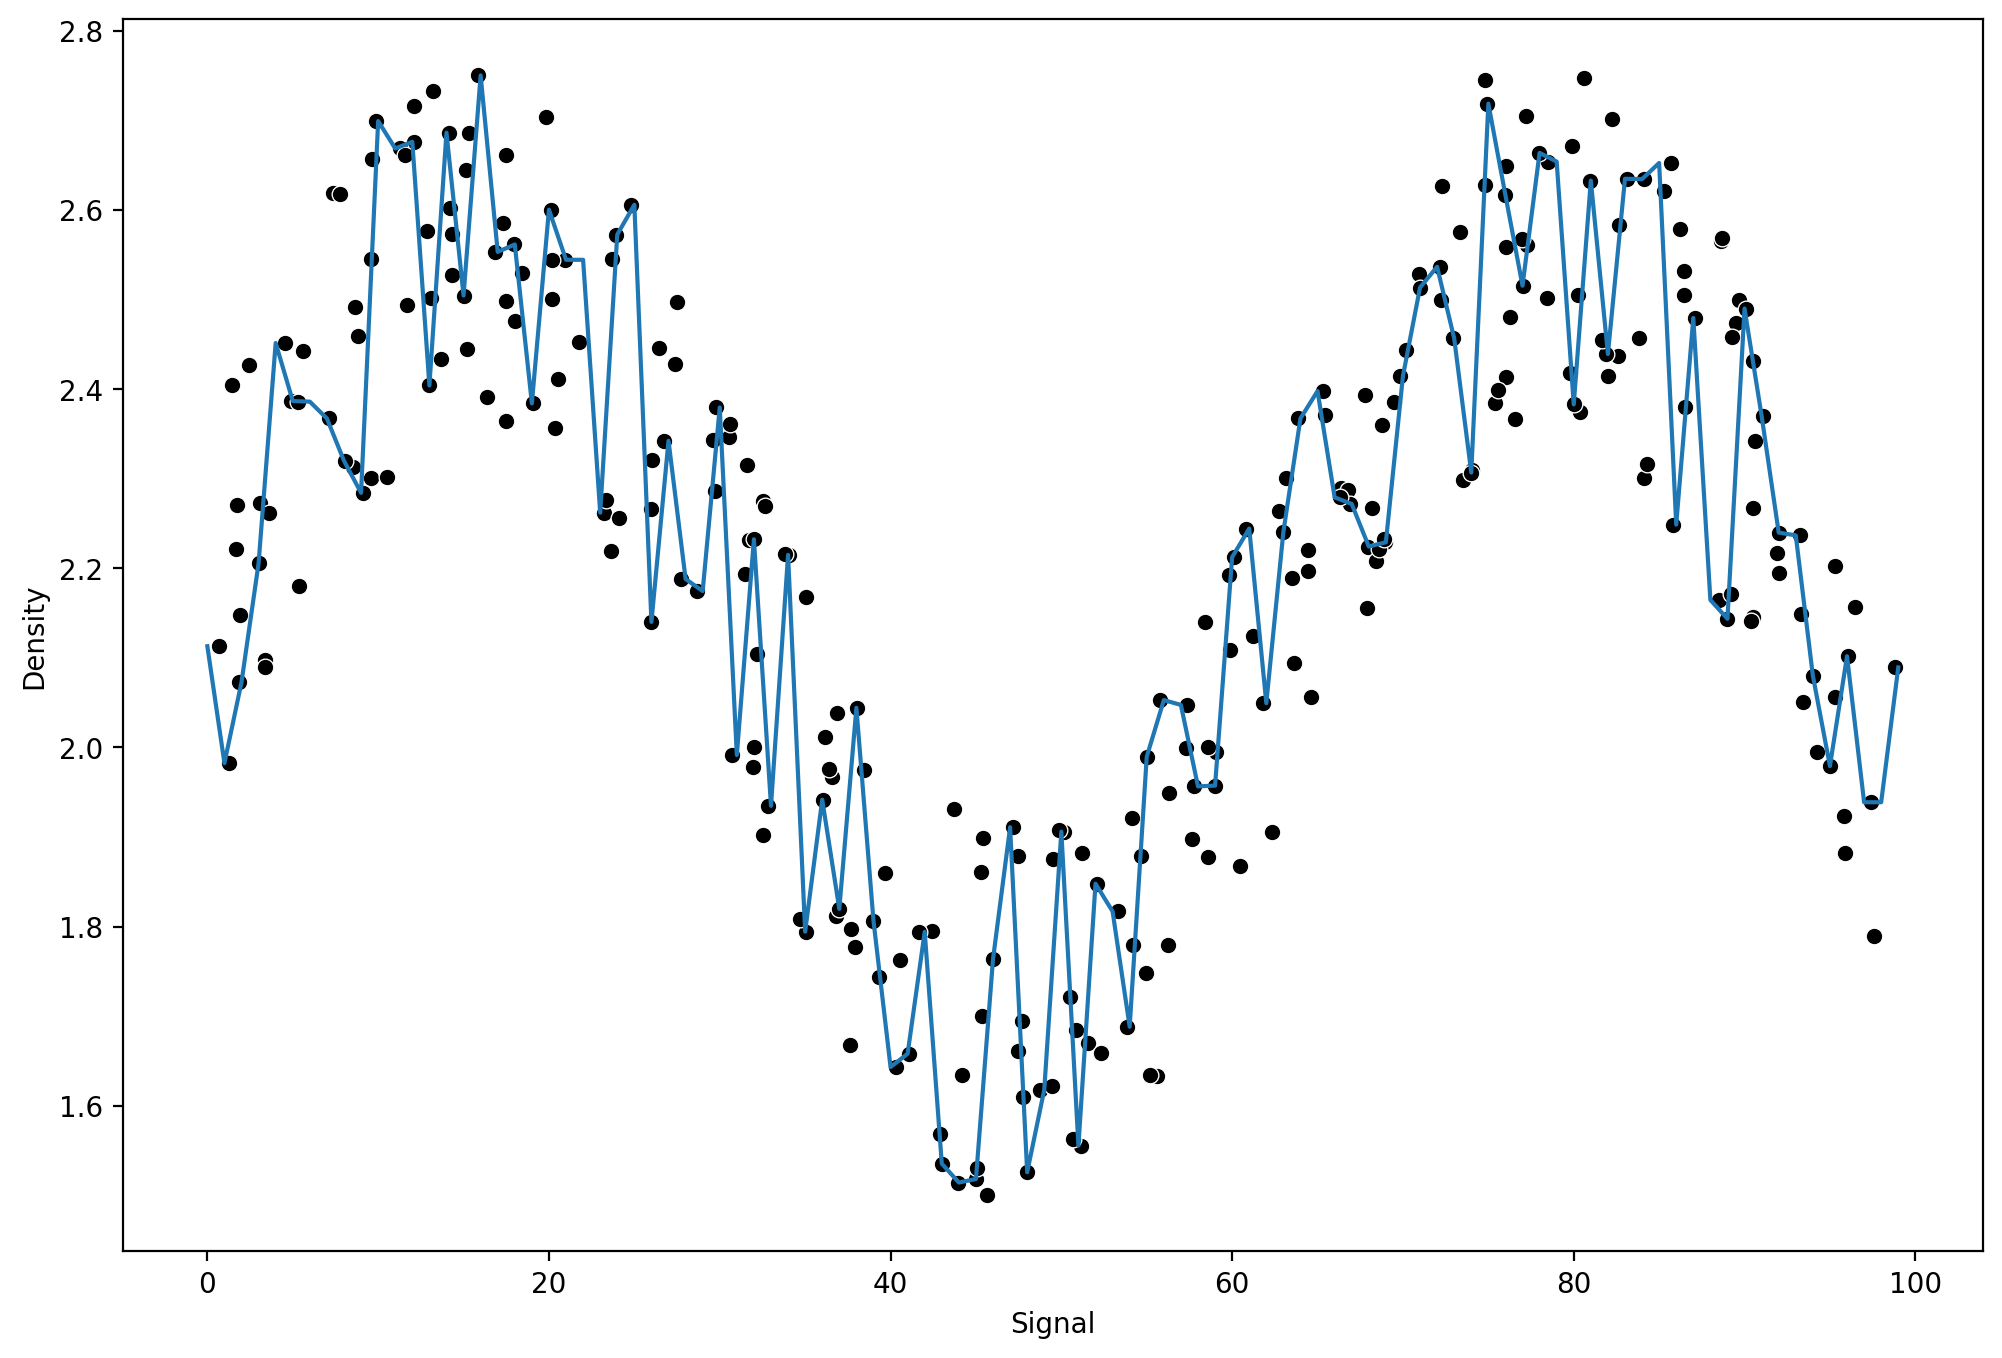

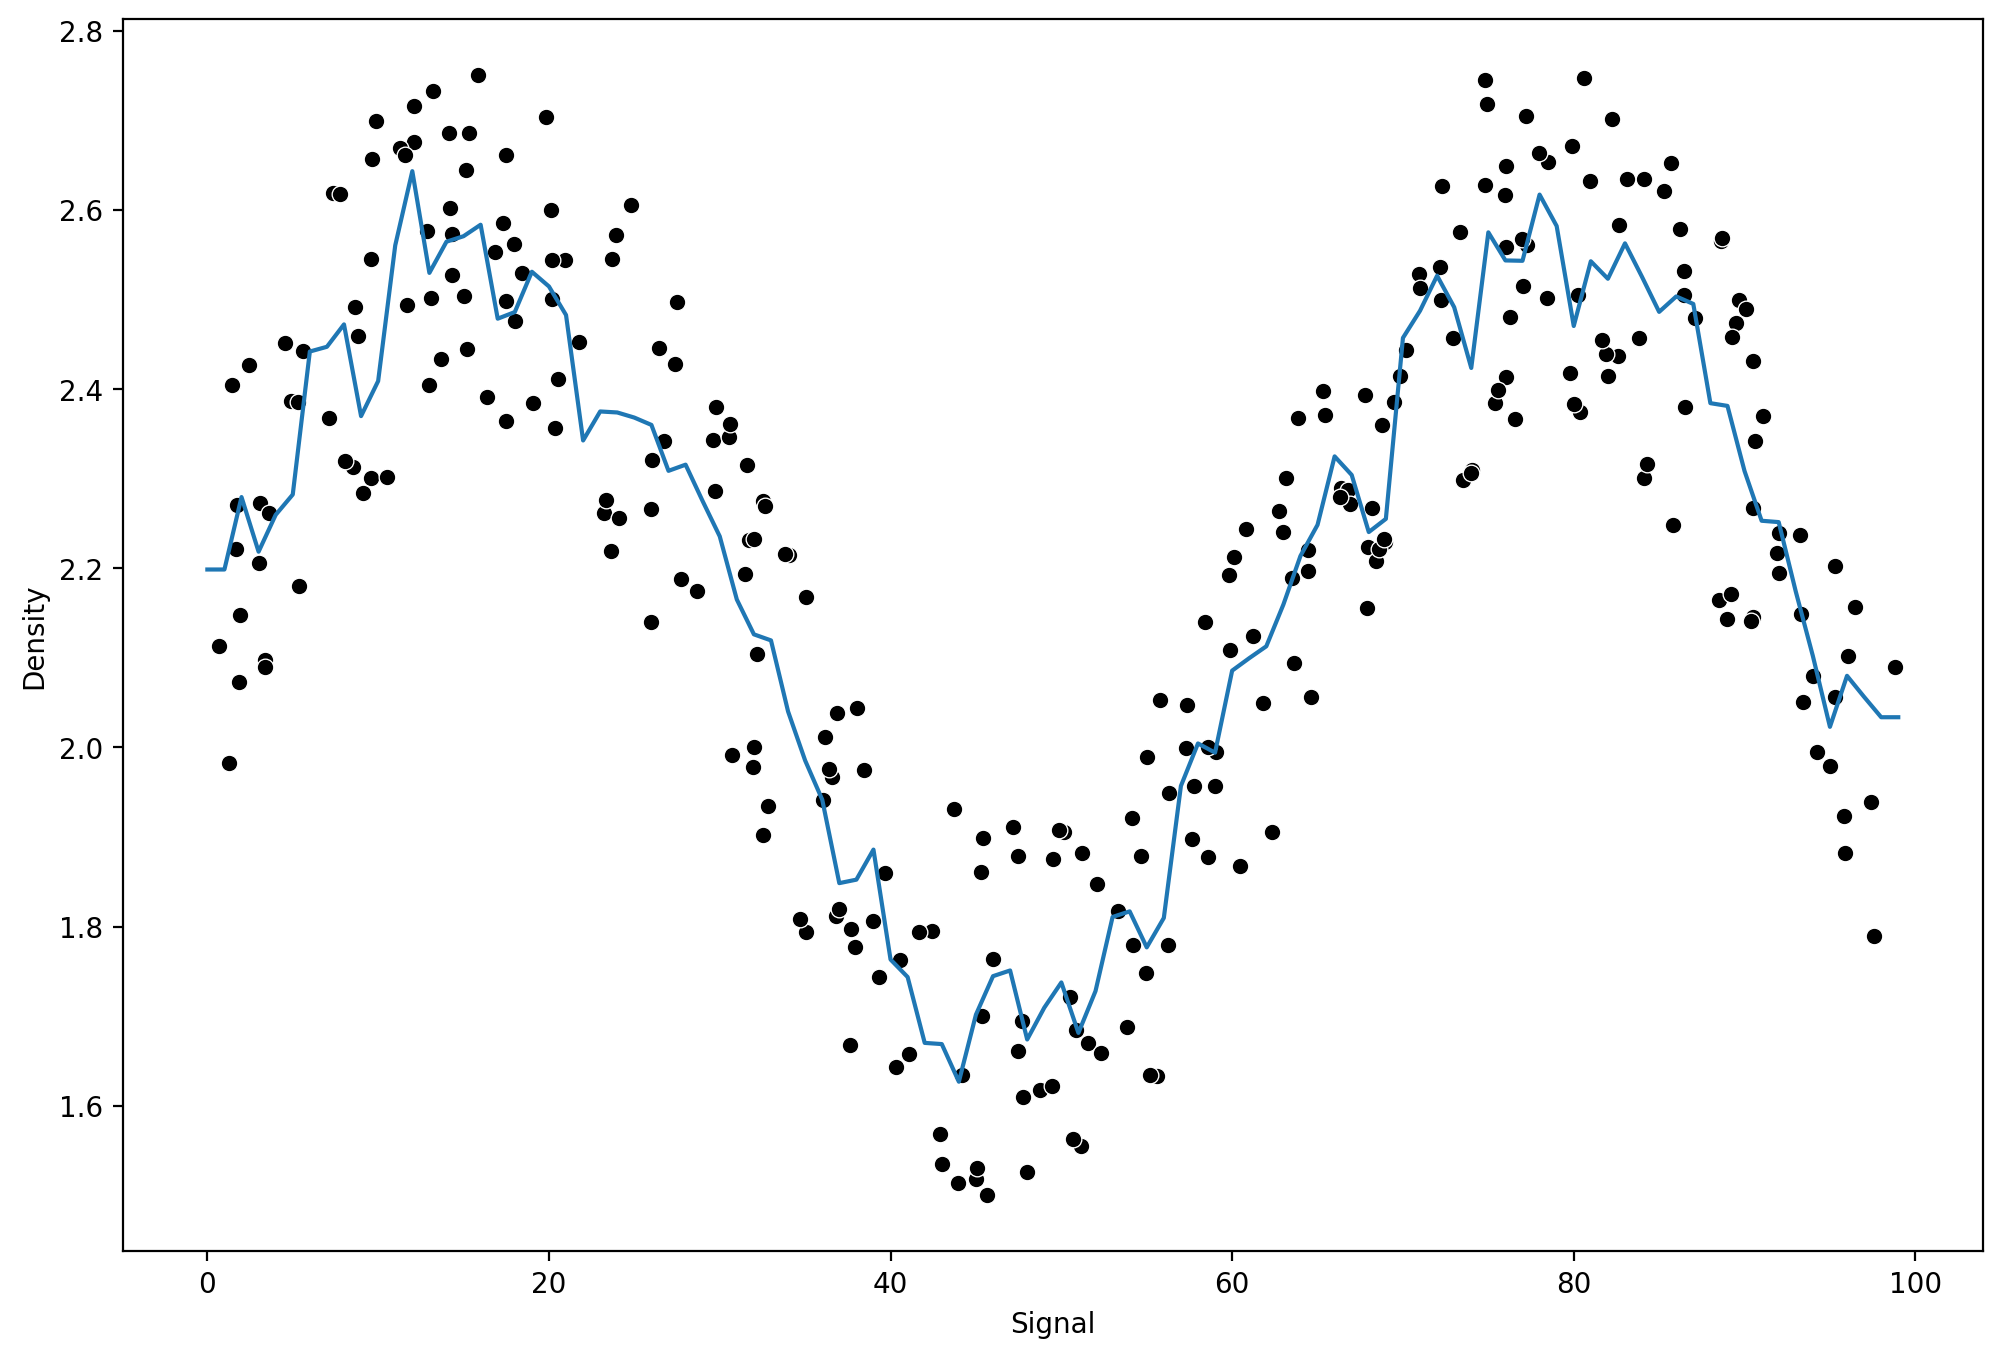

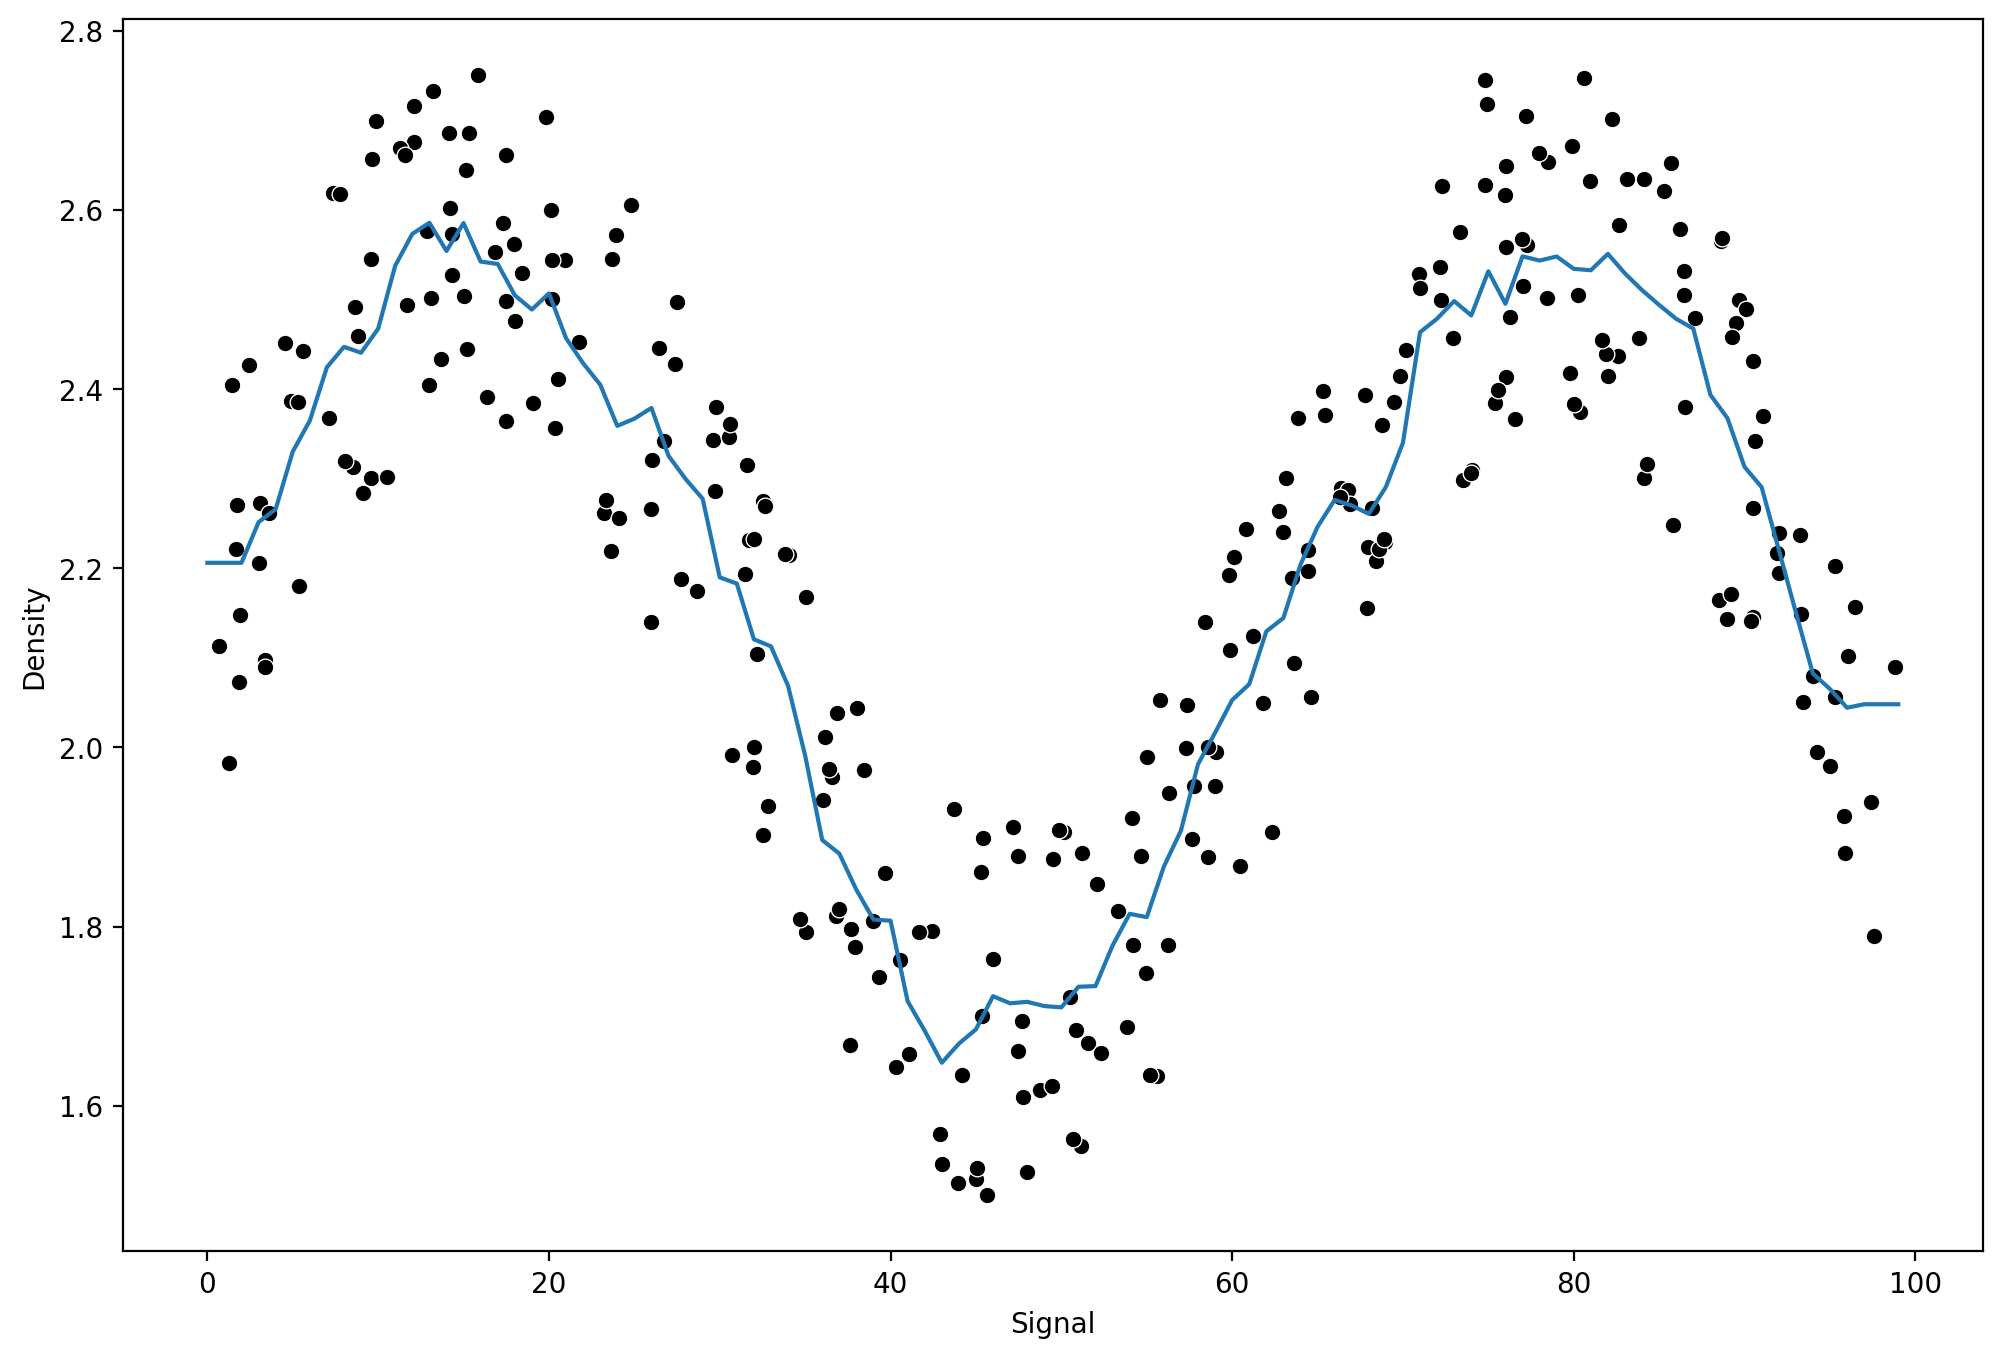

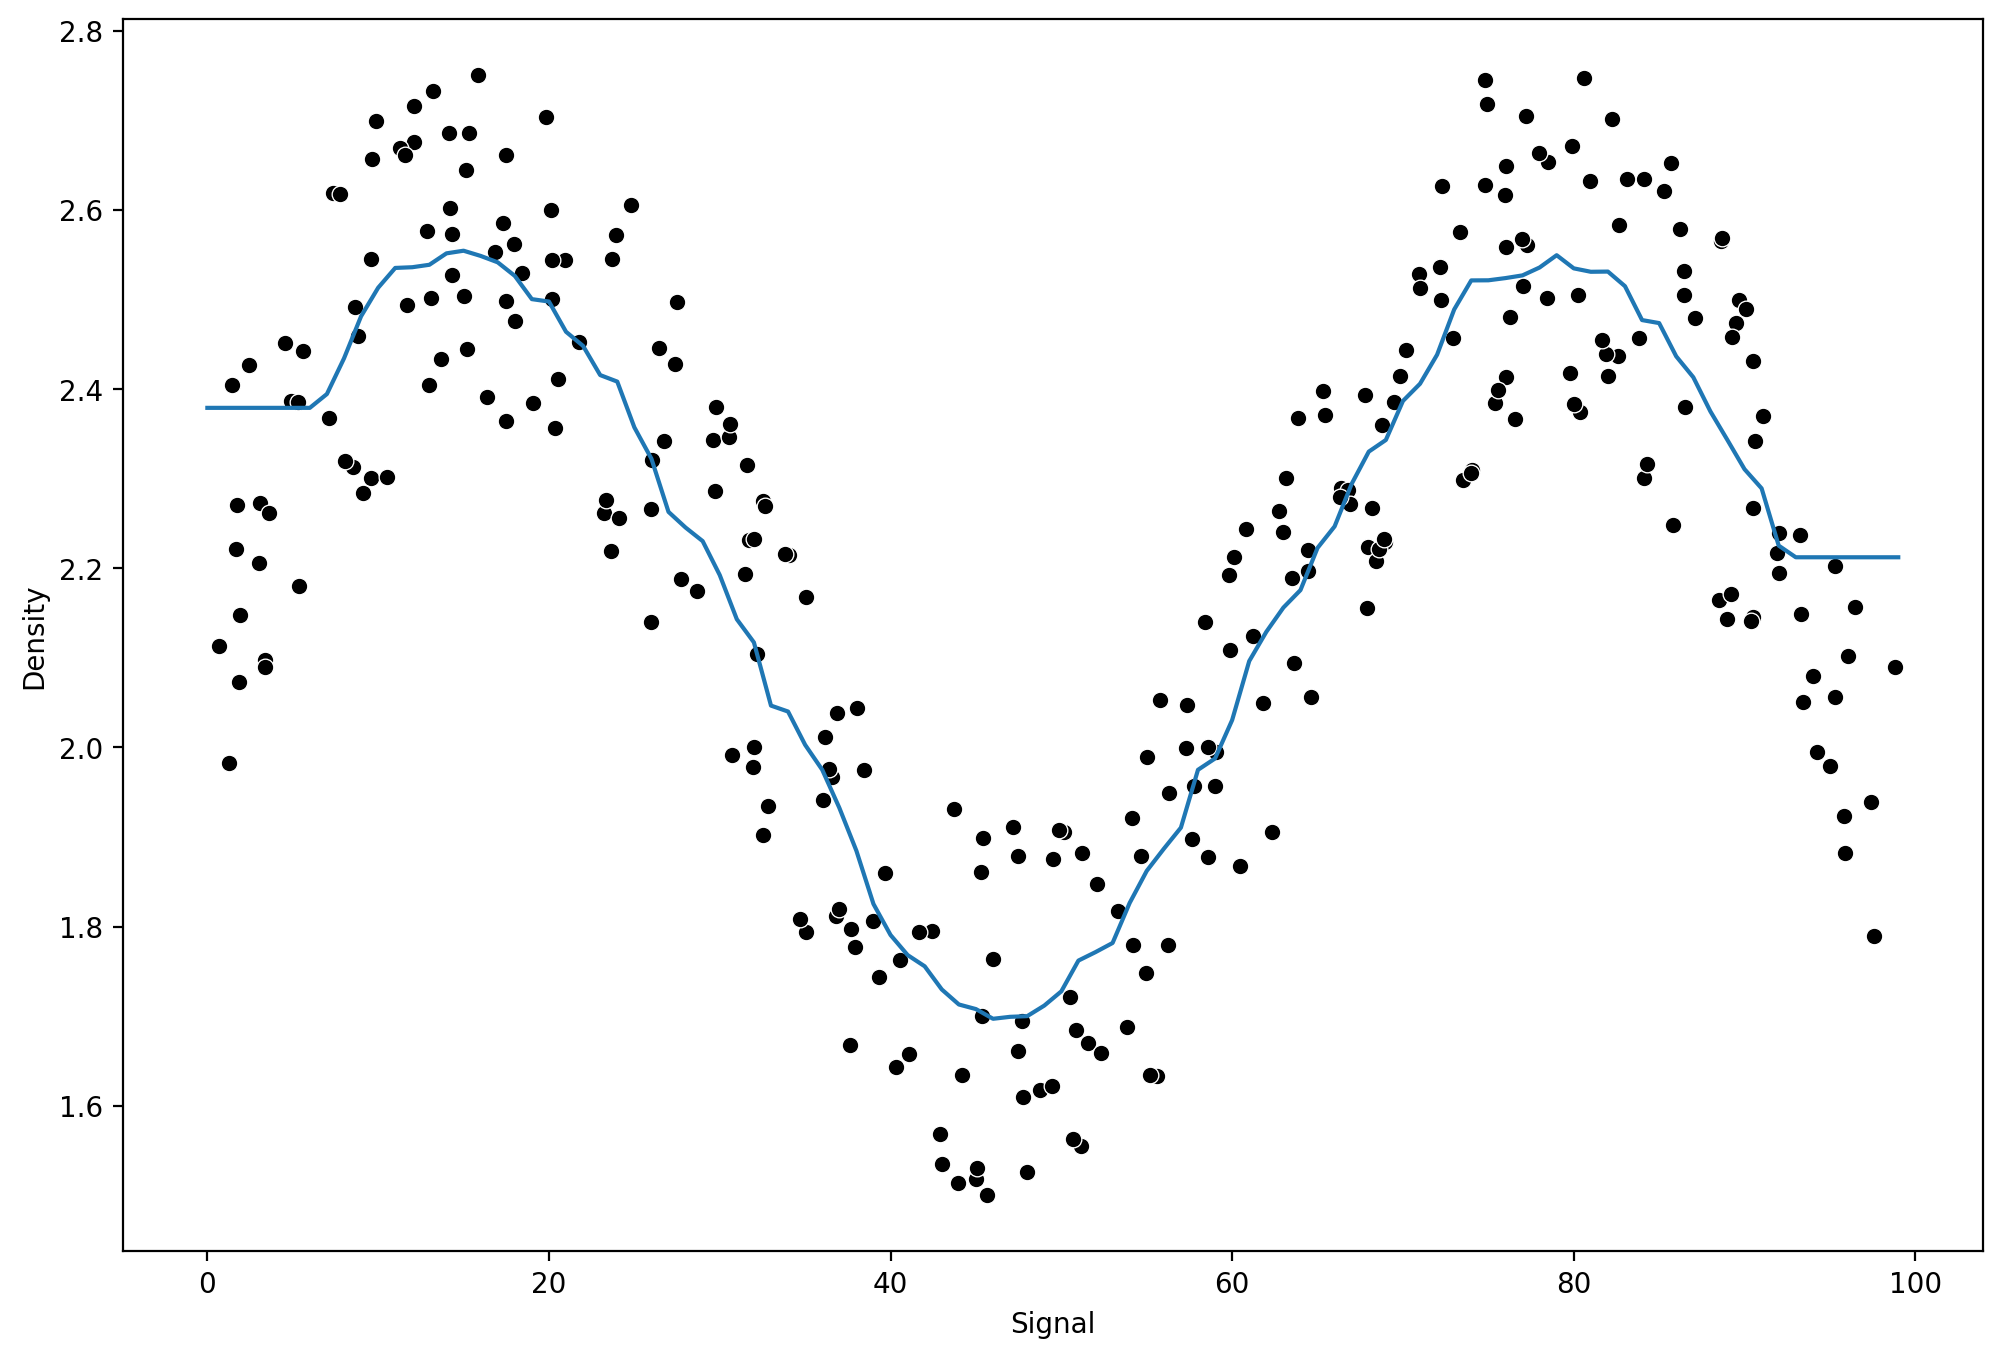

In [ ]:
k_values = [1, 5, 10, 30]

for n in k_values:

    model = KNeighborsRegressor(n_neighbors = n)
    run_model(model, X_train, y_train, X_test, y_test)

#Notice that increasing k improves performance at first, but it worsens when it gets too high.
#The principle of cutting off at a value that doesn't have excessive bias is called 'early stopping'

Decision Tree Regression:

In [49]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


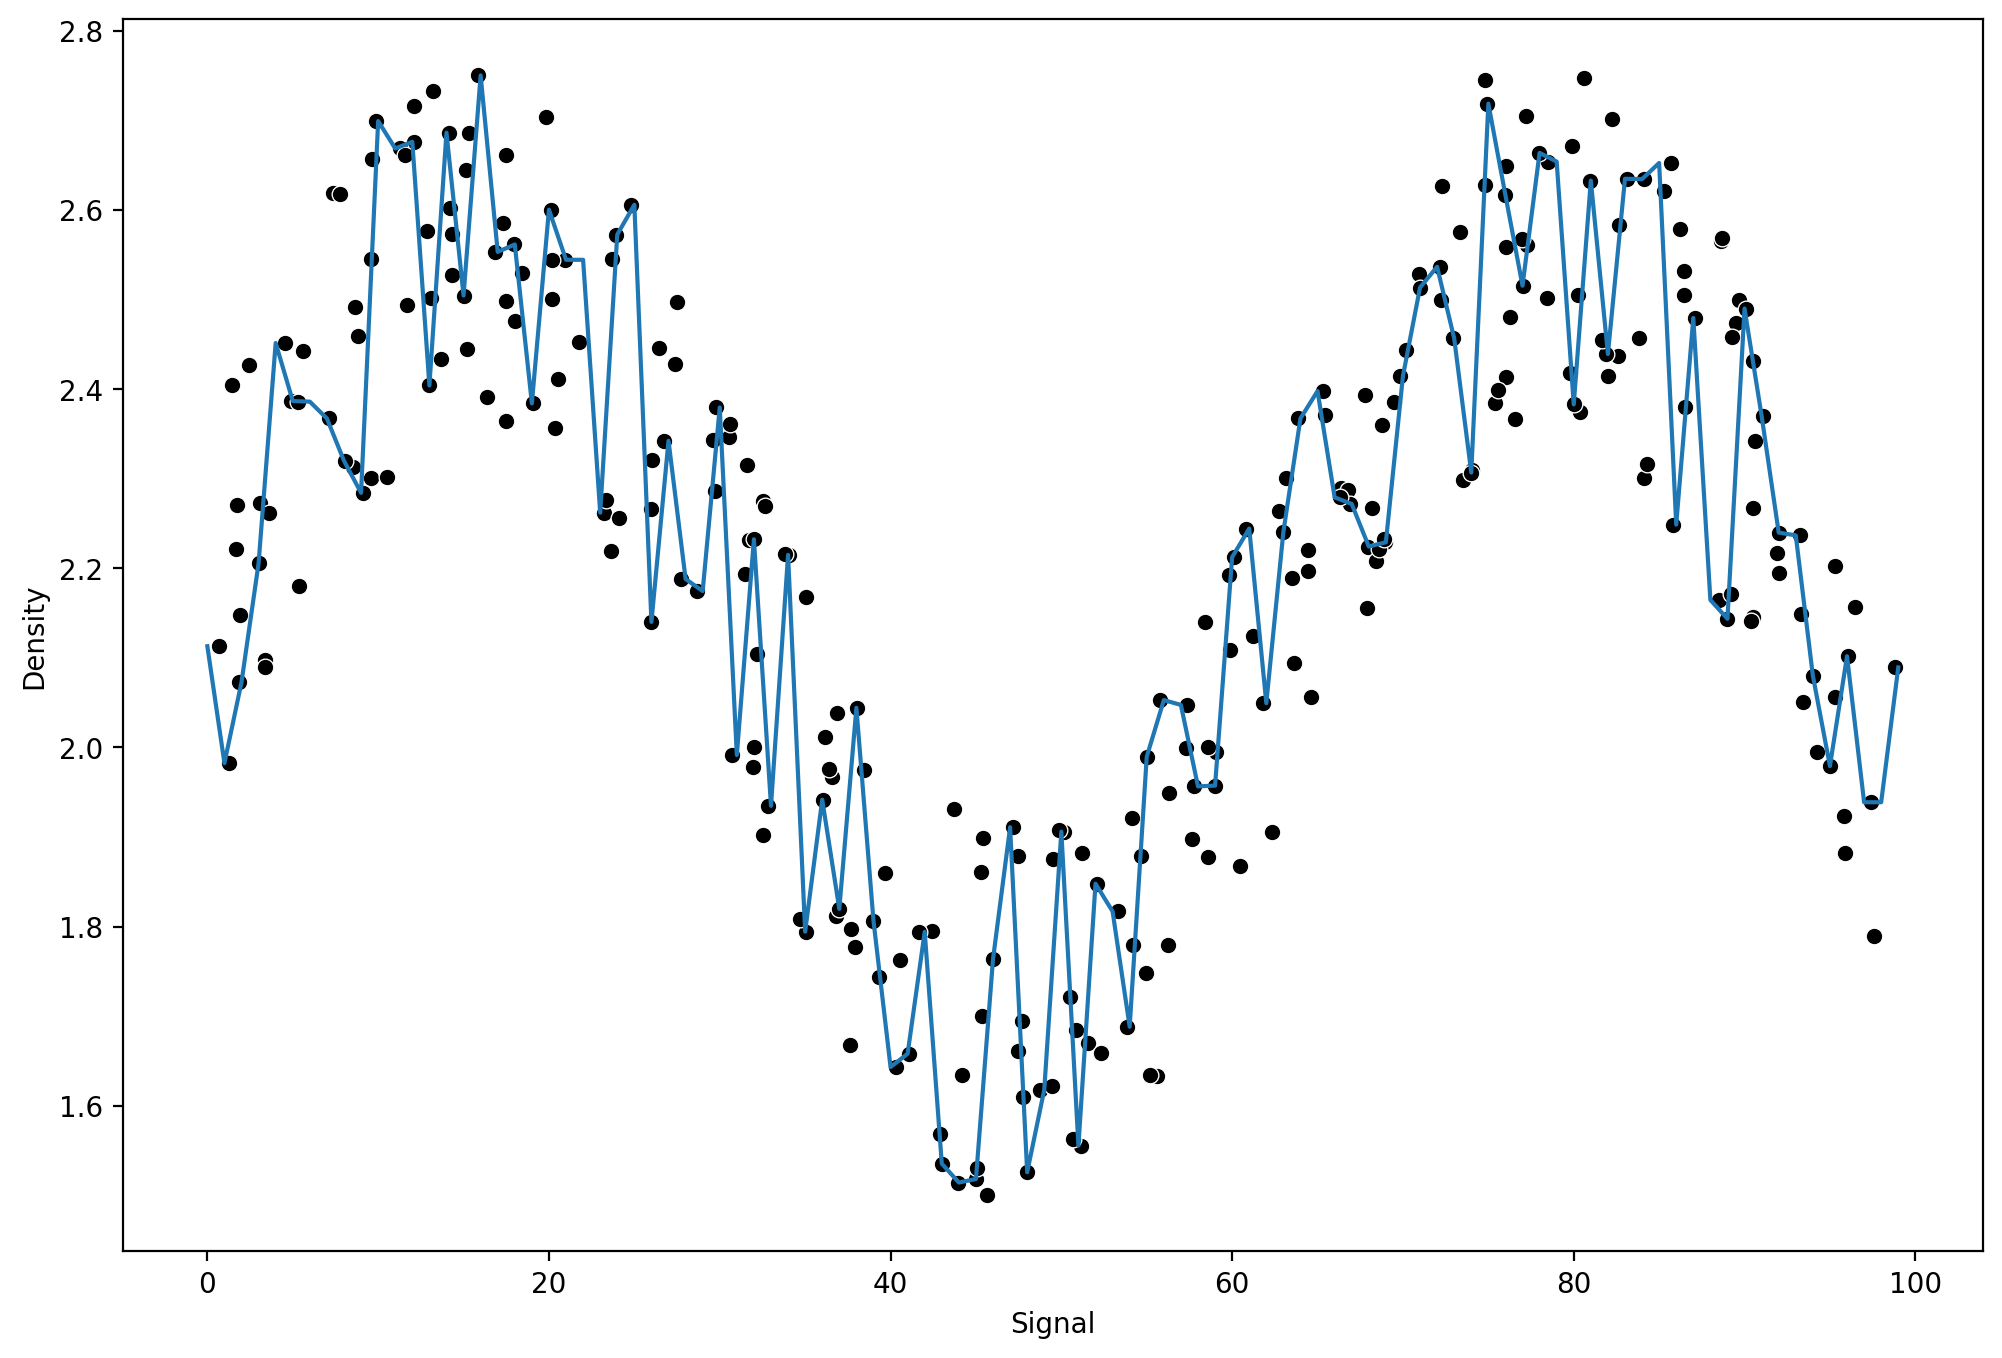

In [ ]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)
#Using a single decision tree is similar to having a very small k value in KNN, as it often overfits to the training data

Support Vector Machine Regression:

In [51]:
from sklearn.svm import SVR

In [ ]:
from sklearn.model_selection import GridSearchCV
#Due to it being hard to know if the default hyperparameters will be right or wrong, grid search is a necessity with SVMs

In [53]:
svr = SVR()
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100, 1000], 'gamma': ['auto', 'scale']}
grid = GridSearchCV(svr, param_grid)

MAE: 0.10854210121348368
RMSE: 0.12646999302046696


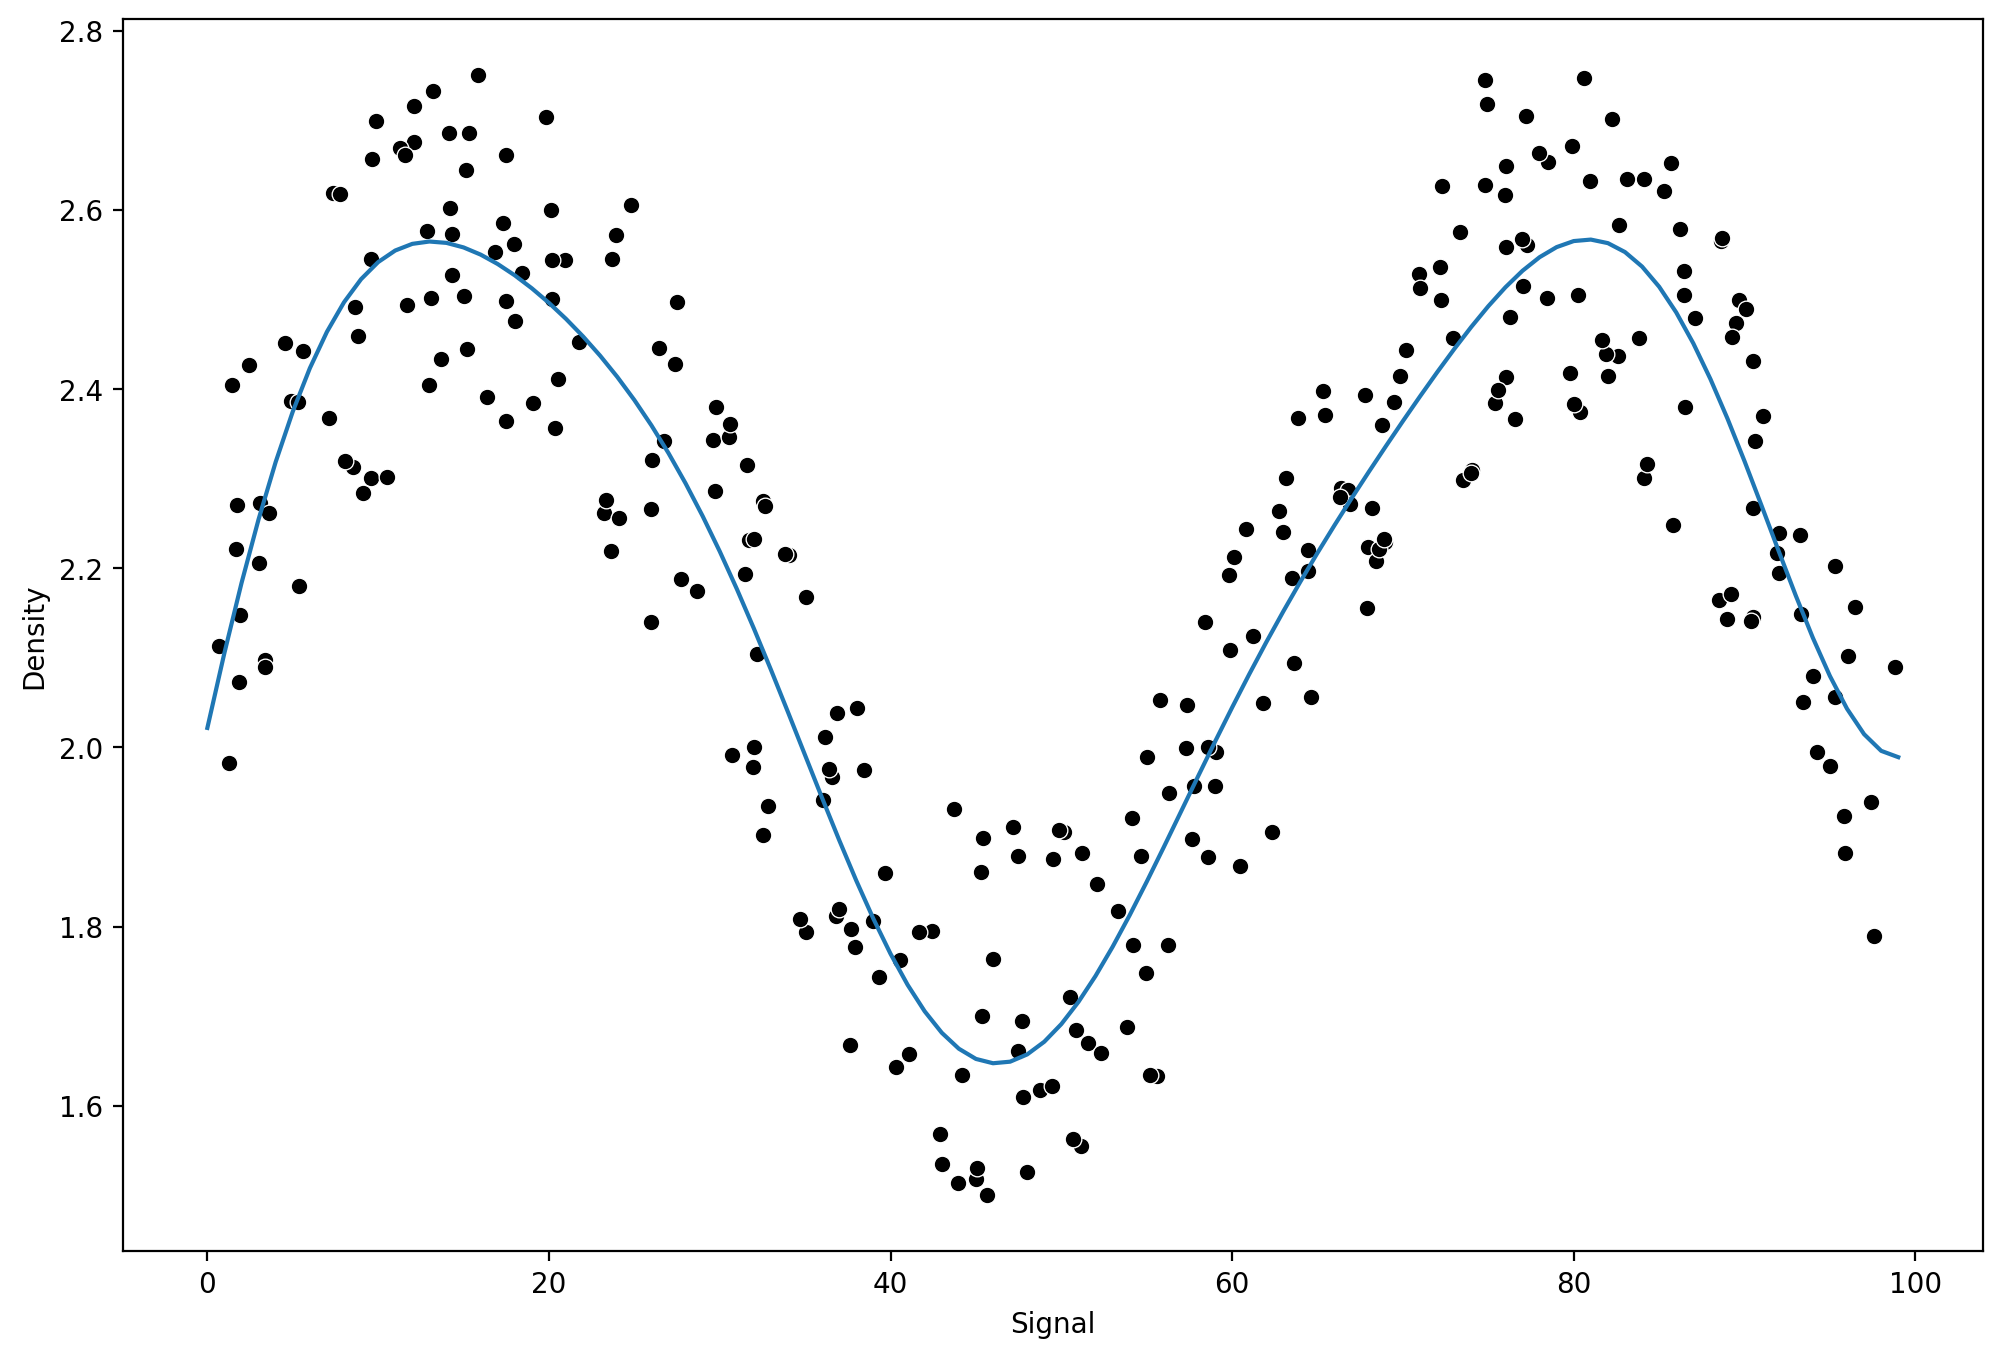

In [ ]:
run_model(grid, X_train, y_train, X_test, y_test)
#While perhaps not as smooth as polynomial order 6 regression, the SVR is performing quite well

Random Forest Regression:

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rfr = RandomForestRegressor(n_estimators = 10)
#Instead of voting on a value like an RFC, an RFR takes the average predicted value of the individual decision trees for the various feature values

MAE: 0.10571540500120034
RMSE: 0.13137374574001054


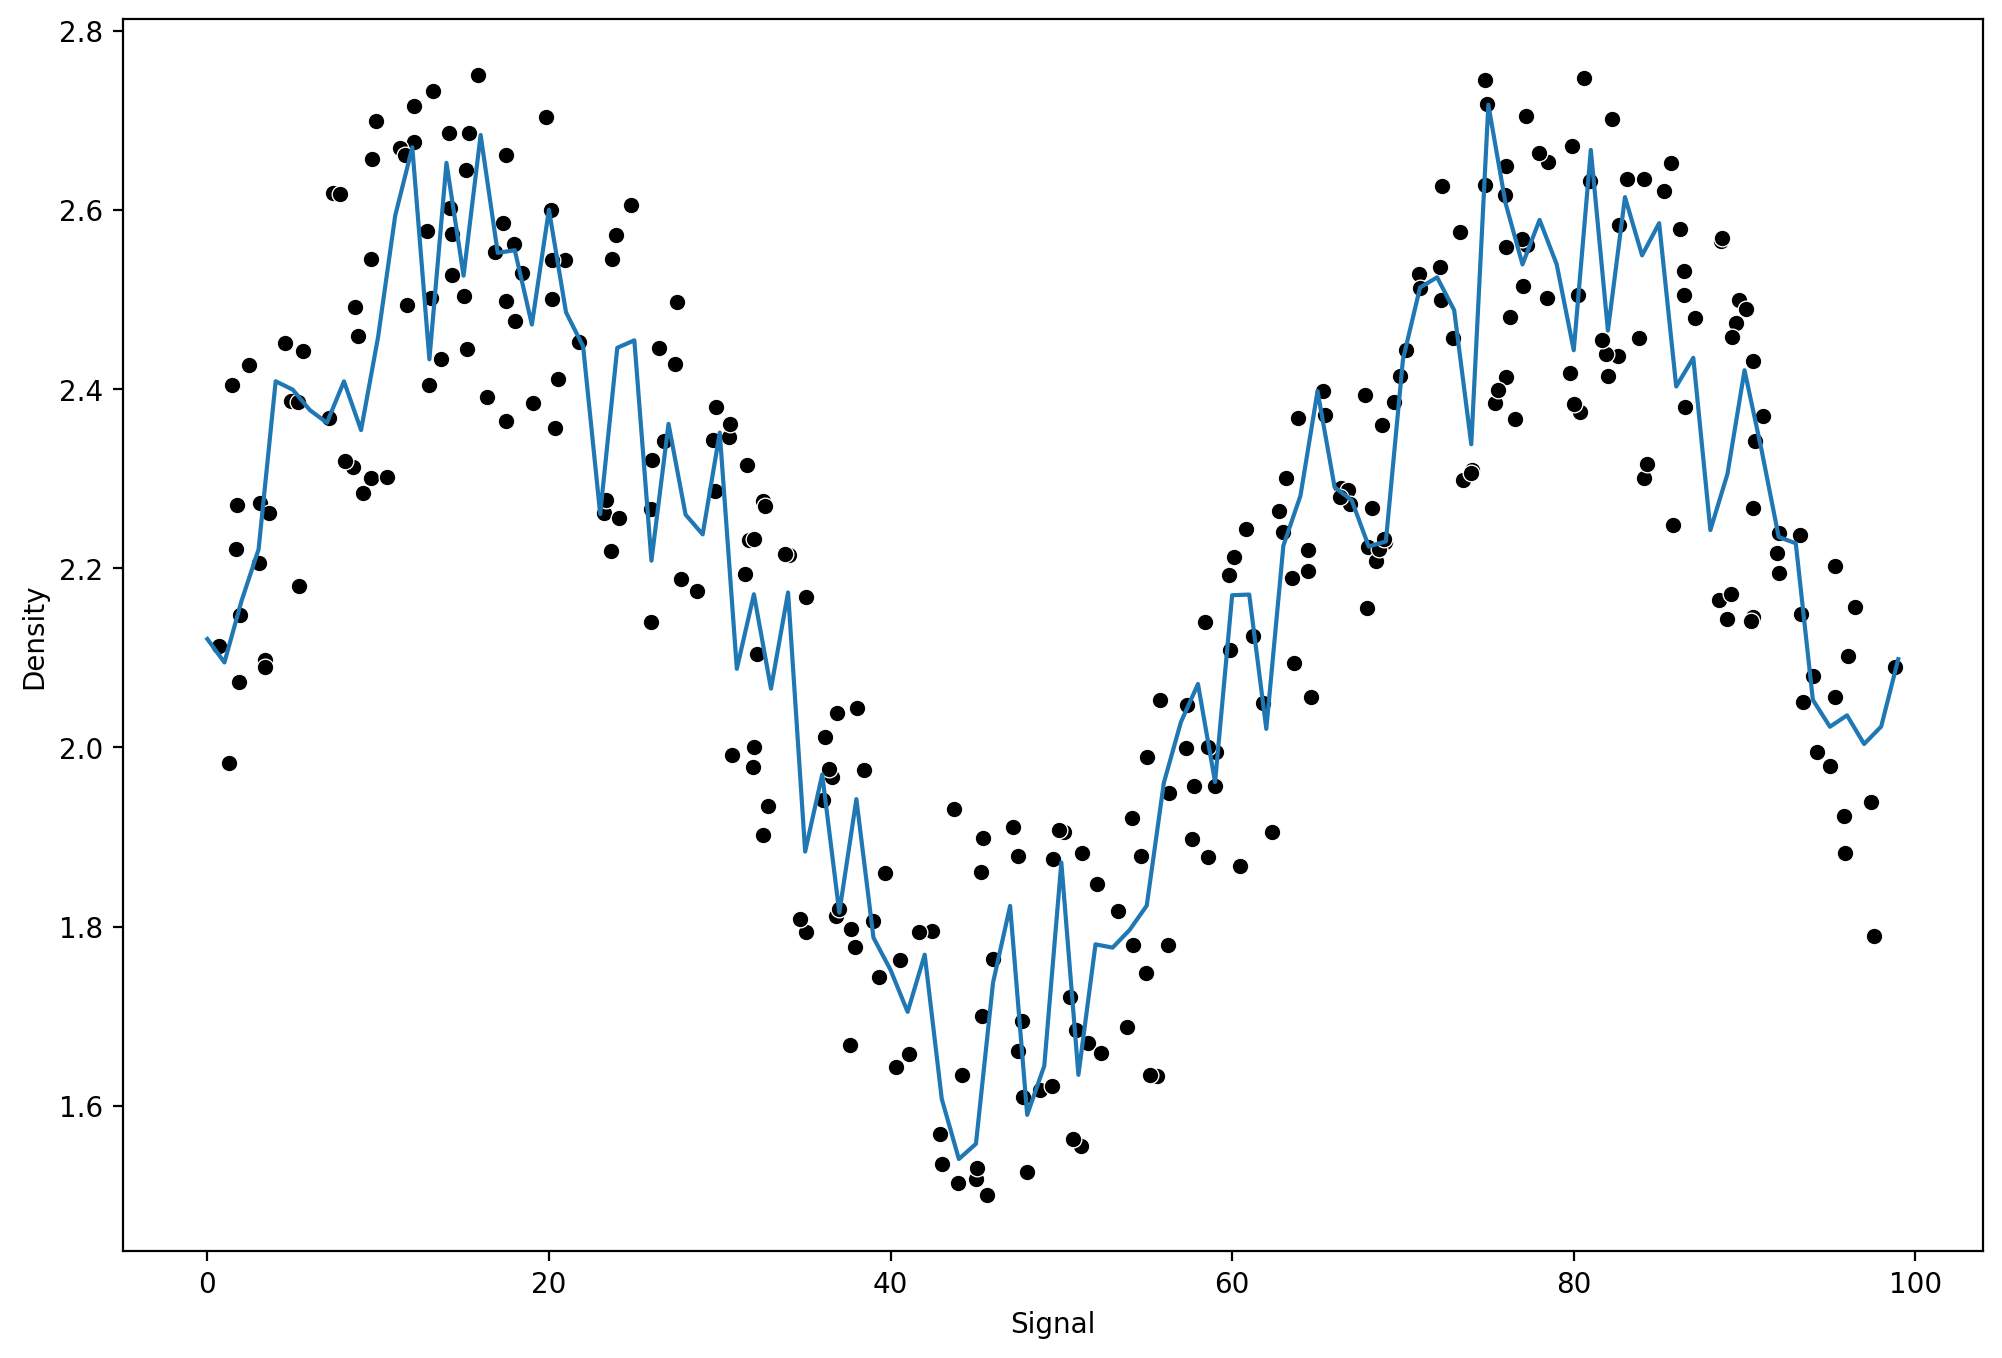

In [ ]:
run_model(rfr, X_train, y_train, X_test, y_test)
#This model may be overfitting a little, but it's sticking to the general shape of the curved data

Boosted Trees Preview:

In [58]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


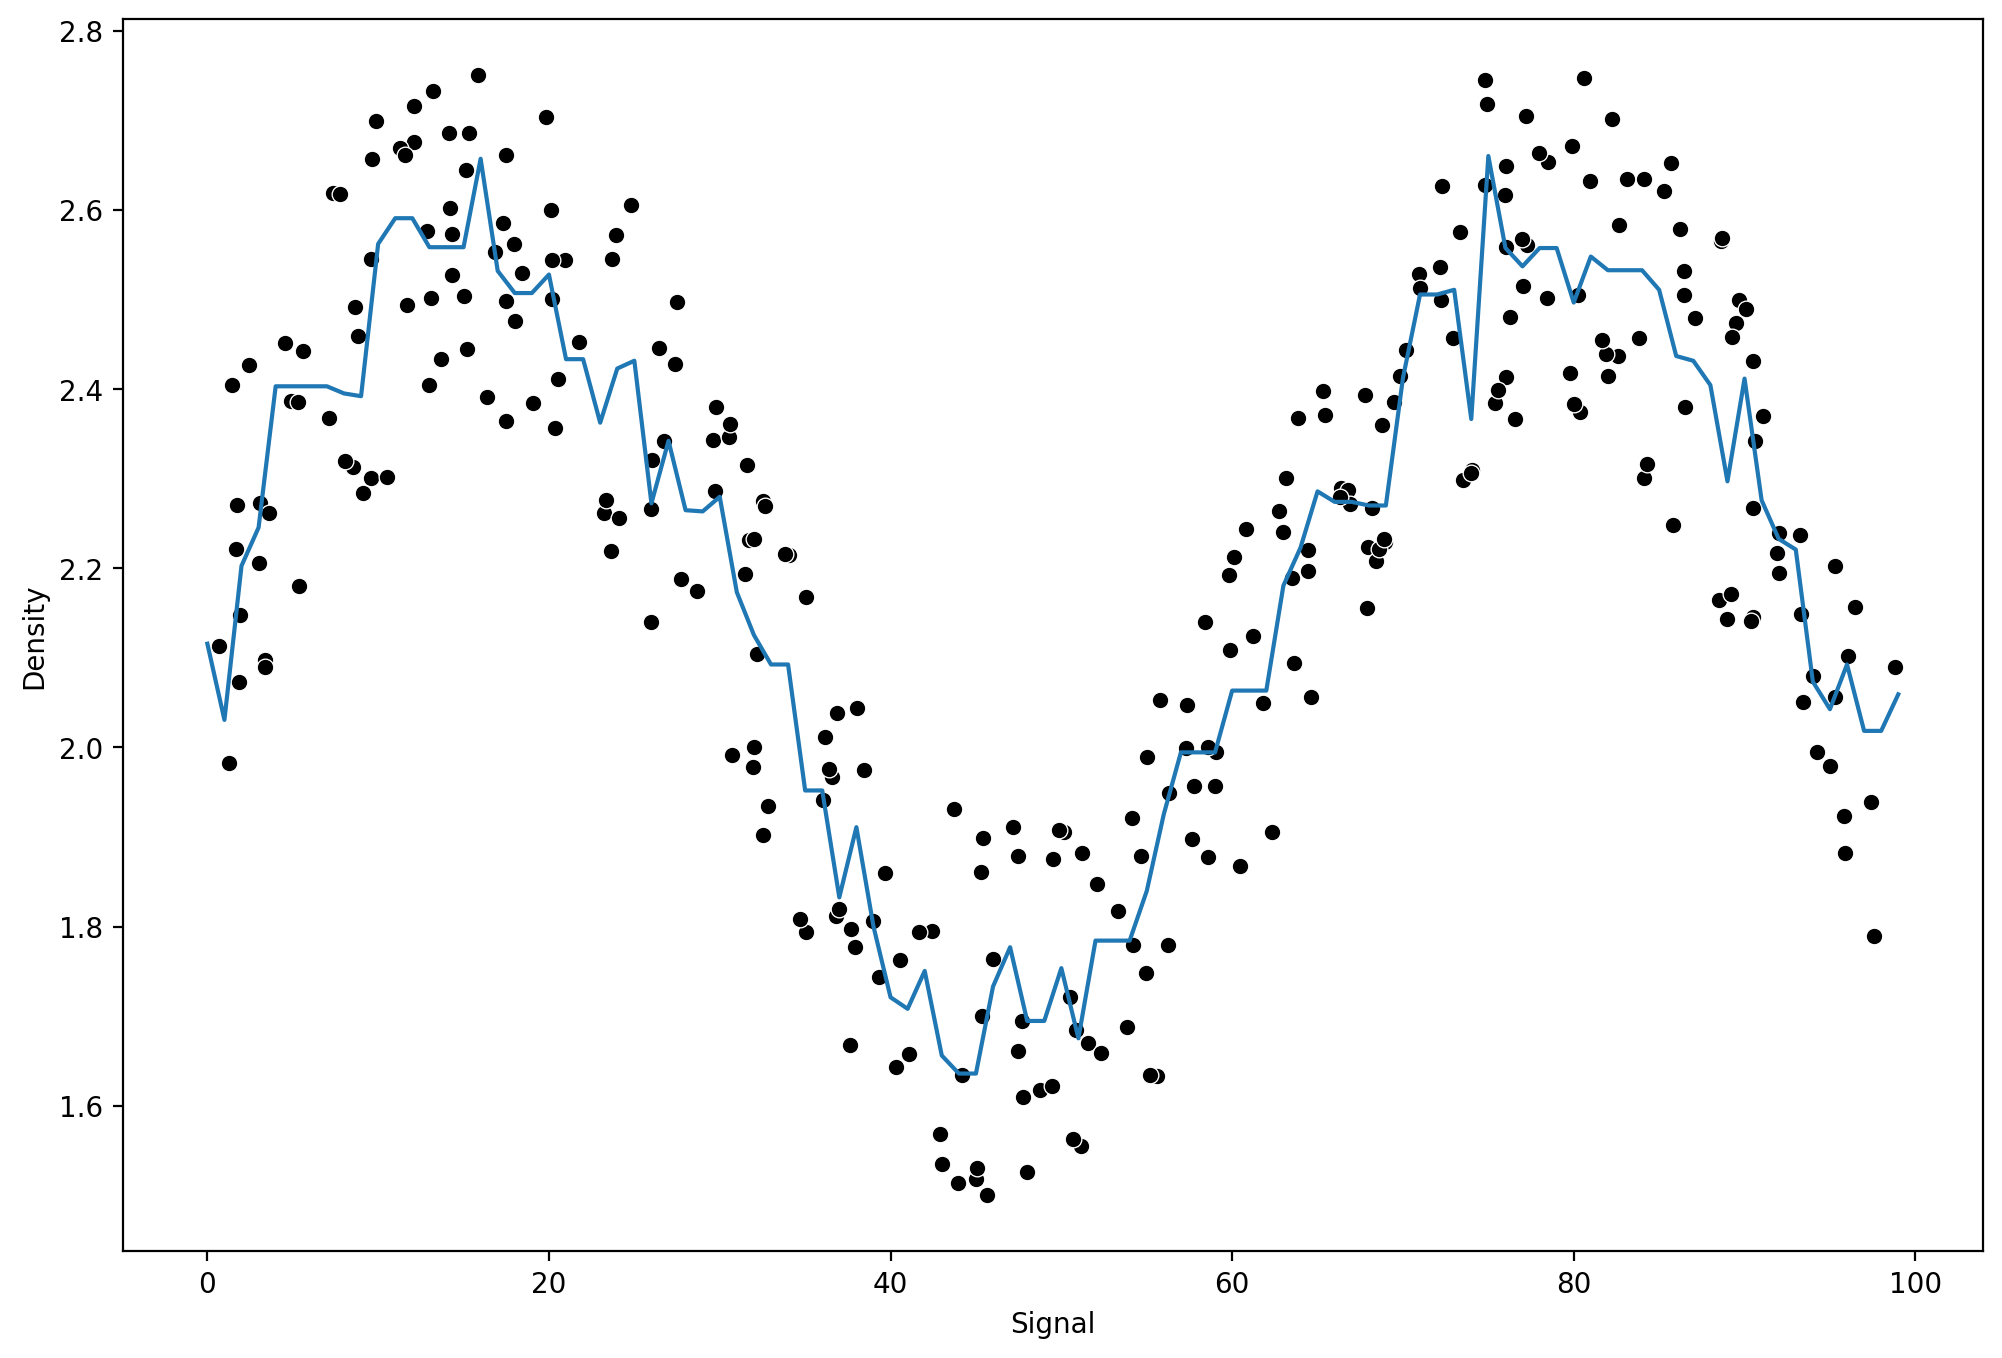

In [ ]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)
#This one in particular isn't picking up as much noise from the individual data points compared to Random Forest

MAE: 0.11849518090537835
RMSE: 0.1369416871940675


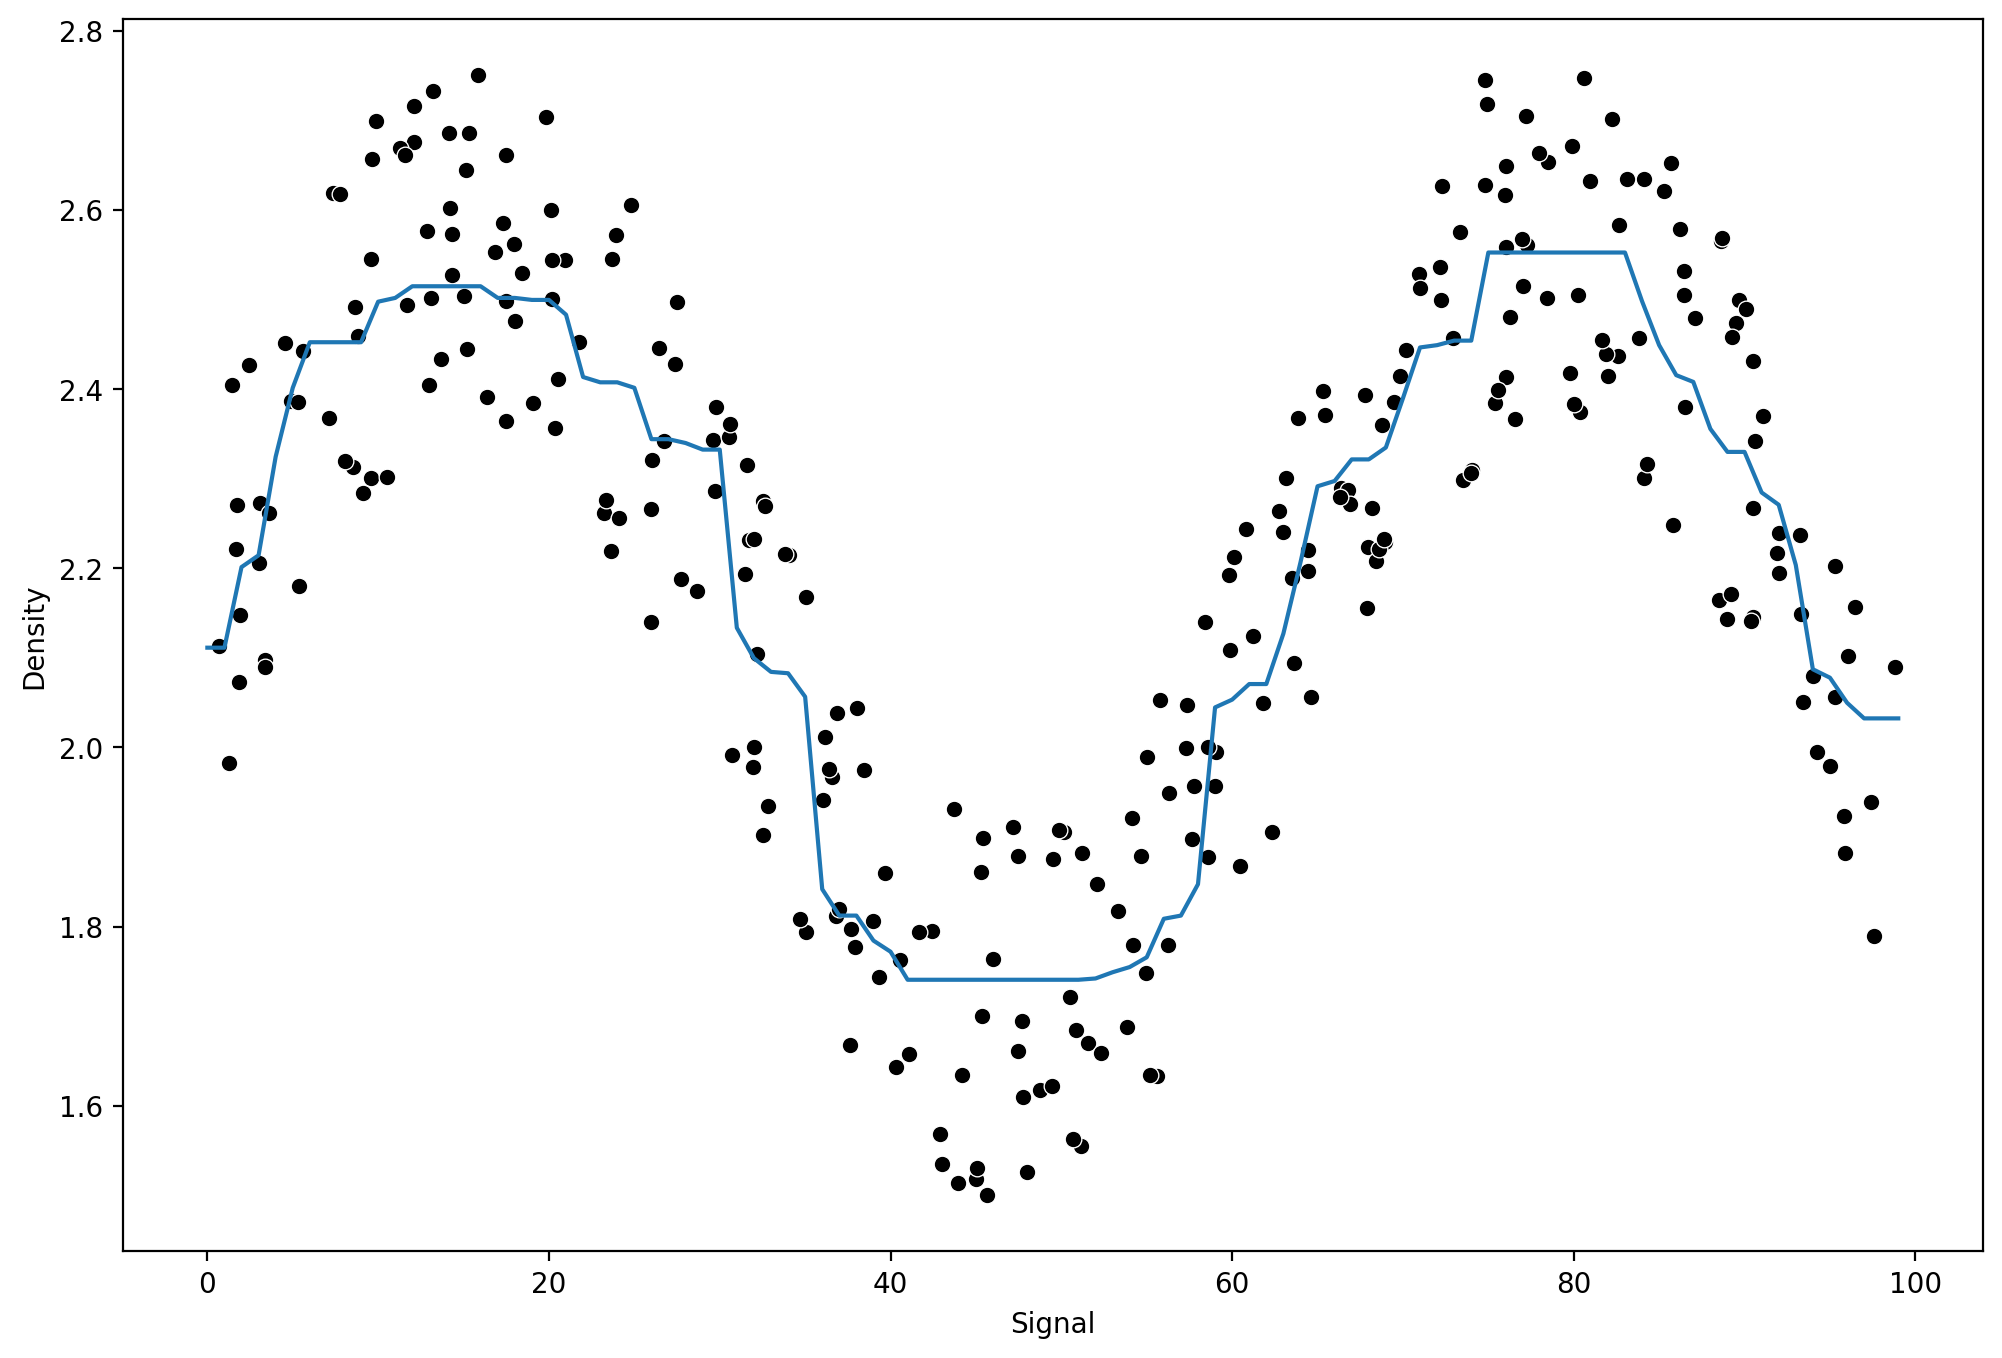

In [ ]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)
#You're getting similar behavior to the above; You'll see why in the next module